## Trực quan hóa dữ liệu

## Mục lục
- [I. Tiền xử lí để trực quan](#i)
- [II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan](#ii)
    - [1. Vấn đề 1: Salary (Lương)](#ii1)
        - [1.1 Câu hỏi 1](#ii1a)
        - [1.2 Câu hỏi 2](#ii1b)
        - [1.3 Câu hỏi 3](#ii1c)
        - [1.4 Câu hỏi 4](#ii1d)
    - [2. Vấn đề 2: Xu hướng tuyển dụng](#ii2)
        - [2.1 Câu hỏi 1](#ii2a)
        - [2.2 Câu hỏi 2](#ii2b)
    - [3. Vấn đề 3: Welfare (Phúc lợi)](#ii3)
        - [3.1 Câu hỏi 1](#ii3a)
        - [3.2 Câu hỏi 2](#ii3b)
        - [3.3 Câu hỏi 3](#ii3c)
        - [3.4 Câu hỏi 4](#ii3d)
- [Tài liệu tham khảo](#tl)

## I. Tiền xử lí để trực quan <a id="i"></a>

In [1]:
# Các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import csv

from sklearn.linear_model import LinearRegression

In [2]:
# Đọc file csv
df = pd.read_csv('../dataset/data_for_visual.csv')
df.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Company Type,Update Date_day,Update Date_month,Update Date_year,Deadline_day,Deadline_month,Deadline_year,Language requirement,Education Levels,Gender Requirement
0,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Binh Đinh,2024-10-25,2024-11-23,2,Trưởng nhóm / Giám sát,"Sảnxuất/Vậnhànhsảnxuất,Đồgỗ,Thumua/Vậttư",Official,"laptop, insurance, travel, allowance, shuttle_...",...,Trách nhiệm hữu hạn,25,10,2024,23,11,2024,1,4,both
1,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Ha Noi,2024-10-25,2024-11-23,1,Nhân viên,"Bảohiểm,Chứngkhoán,Dịchvụkháchhàng",Official,"insurance, travel, bonus, healthcare, training...",...,Cổ phần,25,10,2024,23,11,2024,0,4,both
2,Nhân Viên Thống Kê,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hai Duong,2024-10-25,2024-11-23,0,Nhân viên,"Kếtoán/Kiểmtoán,Thốngkê",Official,"laptop, insurance, travel, allowance, overseas...",...,Cổ phần,25,10,2024,23,11,2024,0,2,both
3,Giám đốc Quan hệ khách hàng Tín dụng - RB - MS...,https://careerviet.vn/vi/tim-viec-lam/giam-doc...,An Giang,2024-10-25,2024-11-23,5,Quản lý,"Dịchvụkháchhàng,Ngânhàng,Tàichính/Đầutư",Official,"insurance, travel, bonus, healthcare, training...",...,Cổ phần,25,10,2024,23,11,2024,0,4,both
4,Nhân viên kỹ thuật tòa nhà (Chấp nhận SV mới r...,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Ha Noi,2024-11-24,2024-12-23,0,Nhân viên,"Điện/Điệntử/Điệnlạnh,Bảotrì/Sửachữa",Official,"insurance, travel, allowance, overseas_travel,...",...,Cổ phần,24,11,2024,23,12,2024,0,2,male


In [3]:
# Danh sách 63 tỉnh/thành phố của Việt Nam
valid_locations = [
    "An Giang", "Bà Rịa - Vũng Tàu", "Bạc Liêu", "Bắc Kạn", "Bắc Giang", "Bắc Ninh",
    "Bến Tre", "Bình Dương", "Bình Định", "Bình Phước", "Bình Thuận", "Cà Mau",
    "Cần Thơ", "Cao Bằng", "Đà Nẵng", "Đắk Lắk", "Đắk Nông", "Điện Biên",
    "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tĩnh",
    "Hải Dương", "Hải Phòng", "Hòa Bình", "Hậu Giang", "Hoà Bình", "Hồ Chí Minh",
    "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lạng Sơn",
    "Lào Cai", "Long An", "Nam Định", "Nghệ An", "Ninh Bình", "Ninh Thuận",
    "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh",
    "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên",
    "Thanh Hóa", "Thừa Thiên - Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang",
    "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"
]

In [4]:
# In ra cột 'Location' của dataframe
print(df['Location'].unique())

['Binh Đinh' 'Ha Noi' 'Hai Duong' 'An Giang' 'Long An' 'Ho Chi Minh'
 'Quang Ninh' 'Đa Nang' 'Binh Duong' 'Quang Ngai' 'Đong Nai' 'Hung Yen'
 'Vinh Long' 'Ha Nam' 'Lam Đong' 'Can Tho' 'Dak Lak' 'Gia Lai' 'Khanh Hoa'
 'Bac Giang' 'Binh Thuan' 'Tay Ninh' 'Ba Ria - Vung Tau' 'Tien Giang'
 'Thai Binh' 'Bac Lieu' 'Thanh Hoa' 'Bac Ninh' 'Tra Vinh' 'Ninh Thuan'
 'Hoa Binh' 'Binh Phuoc' 'Hai Phong' 'Kien Giang' 'Cao Bang' 'Yen Bai'
 'Hau Giang' 'Vinh Phuc' 'Ha Giang' 'Tuyen Quang' 'Đien Bien' 'Nam Đinh'
 'Lang Son' 'Kv Đong Nam Bo' 'Nghe An' 'Quang Tri' 'Đong Thap' 'Quang Nam'
 'Thua Thien- Hue' 'Toan Quoc' 'Phu Yen' 'Quang Binh' 'Vientiane'
 'Phu Tho' 'Svay Rieng' 'Ninh Binh' 'Thai Nguyen' 'Bac Can' 'Son La'
 'Ha Tinh' 'Ben Tre' 'Ca Mau' 'Kv Tay Nguyen' 'Lao Cai' 'Soc Trang'
 'Dak Nong' 'Khac' 'Attapeu' 'Đong Bang Song Cuu Long' 'Quoc Te' 'Kon Tum'
 'Tokyo' 'Xiangkhouang' 'Champasak' 'Yokohama' 'Hokkaido' 'Malaysia'
 'Kv Bac Trung Bo' 'Bangkok' 'Kv Nam Trung Bo' 'Lai Chau' 'Phnompenh'
 'Krati

In [5]:
# Tạo từ điển ánh xạ tên địa điểm sang tiếng Việt chuẩn
city_to_vietnamese = {
    "Hai Duong": "Hải Dương",
    "Long An": "Long An",
    "Ha Noi": "Hà Nội",
    "Ho Chi Minh": "Thành phố Hồ Chí Minh",
    "Binh Duong": "Bình Dương",
    "Đong Nai": "Đồng Nai",
    "Quang Ngai": "Quảng Ngãi",
    "Vinh Long": "Vĩnh Long",
    "Lam Đong": "Lâm Đồng",
    "Can Tho": "Cần Thơ",
    "Bac Ninh": "Bắc Ninh",
    "Dak Lak": "Đắk Lắk",
    "Gia Lai": "Gia Lai",
    "Bac Giang": "Bắc Giang",
    "Binh Thuan": "Bình Thuận",
    "Tay Ninh": "Tây Ninh",
    "Ba Ria - Vung Tau": "Bà Rịa - Vũng Tàu",
    "Ha Nam": "Hà Nam",
    "Thai Binh": "Thái Bình",
    "Bac Lieu": "Bạc Liêu",
    "Thanh Hoa": "Thanh Hóa",
    "Binh Đinh": "Bình Định",
    "Tra Vinh": "Trà Vinh",
    "Hoa Binh": "Hòa Bình",
    "Đa Nang": "Đà Nẵng",
    "Hung Yen": "Hưng Yên",
    "Hai Phong": "Hải Phòng",
    "Kien Giang": "Kiên Giang",
    "Vinh Phuc": "Vĩnh Phúc",
    "Ha Giang": "Hà Giang",
    "Tuyen Quang": "Tuyên Quang",
    "Đien Bien": "Điện Biên",
    "Nam Dinh": "Nam Định",
    "Lang Son": "Lạng Sơn",
    "Nghe An": "Nghệ An",
    "Quang Tri": "Quảng Trị",
    "Quang Ninh": "Quảng Ninh",
    "Ninh Thuan": "Ninh Thuận",
    "Đong Thap": "Đồng Tháp",
    "Quang Nam": "Quảng Nam",
    "Thua Thien- Hue": "Thừa Thiên - Huế",
    "Tien Giang": "Tiền Giang",
    "Khanh Hoa": "Khánh Hòa",
    "Phu Yen": "Phú Yên",
    "Quang Binh": "Quảng Bình",
    "Hau Giang": "Hậu Giang",
    "Binh Phuoc": "Bình Phước",
    "Phu Tho": "Phú Thọ",
    "Ninh Binh": "Ninh Bình",
    "Thai Nguyen": "Thái Nguyên",
    "Bac Can": "Bắc Cạn",
    "Son La": "Sơn La",
    "Ha Tinh": "Hà Tĩnh",
    "Yen Bai": "Yên Bái",
    "Ca Mau": "Cà Mau",
    "An Giang": "An Giang",
    "Ben Tre": "Bến Tre",
    "Lao Cai": "Lào Cai",
    "Soc Trang": "Sóc Trăng",
    "Cao Bang": "Cao Bằng",
    "Dak Nong": "Đắk Nông",
    "Kon Tum": "Kon Tum",
    "Lai Chau": "Lai Châu",
    
    # Khu vực khác
    "Kv Đong Nam Bo": "Khu vực Đông Nam Bộ",
    "Kv Tay Nguyen": "Khu vực Tây Nguyên",
    "Kv Nam Trung Bo": "Khu vực Nam Trung Bộ",
    "Kv Bac Trung Bo": "Khu vực Bắc Trung Bộ",
    "Đong Bang Song Cuu Long": "Đồng Bằng Sông Cửu Long",
    "Toan Quoc": "Toàn Quốc",
    "Khac": "Khác",

    # Các địa điểm khác (được gộp chung vào "foreign city/province")
    "Svay Rieng": "foreign city/province",
    "Tokyo": "foreign city/province",
    "Xiangkhouang": "foreign city/province",
    "Champasak": "foreign city/province",
    "Yokohama": "foreign city/province",
    "Hokkaido": "foreign city/province",
    "Malaysia": "foreign city/province",

    "Bangkok": "foreign city/province",
    "Kratie": "foreign city/province",
    "Phnompenh": "foreign city/province"
}
df['City'] = df['Location']
df['Location'] = df['Location'].map(city_to_vietnamese).astype("category")
df['Location'].value_counts()

Location
Thành phố Hồ Chí Minh    6919
Hà Nội                   6221
Bình Dương                959
Đồng Nai                  696
Long An                   400
                         ... 
Khác                        8
Khu vực Bắc Trung Bộ        8
Khu vực Nam Trung Bộ        7
Khu vực Tây Nguyên          5
Lai Châu                    3
Name: count, Length: 70, dtype: int64

In [6]:
# Nhận thấy các dòng mang giá trị Toàn Quốc không mang ý nghĩa trong việc phân tích dữ liệu, nên ta sẽ loại bỏ các dòng này
df = df[df['Location'] != "Toàn Quốc"]

### Việt Nam được chia thành 3 miền và 8 vùng:

Source: [Địa lý Việt Nam](https://vi.wikipedia.org/wiki/%C4%90%E1%BB%8Ba_l%C3%BD_Vi%E1%BB%87t_Nam#C%C3%A1c_v%C3%B9ng_mi%E1%BB%81n).

Bắc Bộ:
- Tây Bắc Bộ
- Đông Bắc Bộ
- Đồng bằng sông Hồng

đôi khi 2 vùng Tây Bắc và Đông Bắc được gộp chung thành Trung du và miền núi phía Bắc

Trung Bộ:
- Bắc Trung Bộ
- Duyên hải Nam Trung Bộ
- Tây Nguyên

Nam Bộ:
- Đông Nam Bộ
- Đồng bằng sông 

In [7]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang vùng
location_to_region = {
# miền Bắc Bộ
    # Tây Bắc Bộ
    "Hòa Bình": "Tây Bắc Bộ", 
    "Lào Cai": "Tây Bắc Bộ",
    "Yên Bái": "Tây Bắc Bộ",
    
    # Đông Bắc Bộ
    "Hà Giang": "Đông Bắc Bộ",
    "Cao Bằng": "Đông Bắc Bộ",
    "Bắc Cạn": "Đông Bắc Bộ",
    "Thái Nguyên": "Đông Bắc Bộ",
    "Lạng Sơn": "Đông Bắc Bộ",
    "Bắc Giang": "Đông Bắc Bộ",
    "Phú Thọ": "Đông Bắc Bộ",
    
    # Đồng bằng sông Hồng
    "Hà Nội": "Đồng bằng sông Hồng",
    "Hải Phòng": "Đồng bằng sông Hồng",
    "Nam Định": "Đồng bằng sông Hồng",
    "Hải Dương": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hà Nam": "Đồng bằng sông Hồng",
    "Thái Bình": "Đồng bằng sông Hồng",
    "Ninh Bình": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hưng Yên": "Đồng bằng sông Hồng",
    
# miền Trung Bộ
    # Bắc Trung Bộ
    "Thanh Hóa": "Bắc Trung Bộ",
    "Nghệ An": "Bắc Trung Bộ",
    "Hà Tĩnh": "Bắc Trung Bộ",
    "Quảng Bình": "Bắc Trung Bộ",
    "Quảng Trị": "Bắc Trung Bộ",
    "Thừa Thiên - Huế": "Bắc Trung Bộ",
    "Khu vực Bắc Trung Bộ": "Bắc Trung Bộ",

    # Duyên hải Nam Trung Bộ
    "Đà Nẵng": "Duyên hải Nam Trung Bộ",
    "Quảng Nam": "Duyên hải Nam Trung Bộ",
    "Quảng Ngãi": "Duyên hải Nam Trung Bộ",
    "Bình Định": "Duyên hải Nam Trung Bộ",
    "Phú Yên": "Duyên hải Nam Trung Bộ",
    "Khánh Hòa": "Duyên hải Nam Trung Bộ",
    "Ninh Thuận": "Duyên hải Nam Trung Bộ",
    "Bình Thuận": "Duyên hải Nam Trung Bộ",
    "Khu vực Nam Trung Bộ": "Duyên hải Nam Trung Bộ",
    
    # Tây Nguyên
    "Lâm Đồng": "Tây Nguyên",
    "Gia Lai": "Tây Nguyên",
    "Kon Tum": "Tây Nguyên",
    "Đắk Nông": "Tây Nguyên",
    "Đắk Lắk": "Tây Nguyên",
    "Khu vực Tây Nguyên": "Tây Nguyên",
    
# miền Nam Bộ
    # Đồng bằng sông Cửu Long
    "Long An": "Đồng bằng sông Cửu Long", 
    "Tiền Giang": "Đồng bằng sông Cửu Long",
    "Bến Tre": "Đồng bằng sông Cửu Long",
    "Bạc Liêu": "Đồng bằng sông Cửu Long",
    "Hậu Giang": "Đồng bằng sông Cửu Long",
    "Đồng Tháp": "Đồng bằng sông Cửu Long",
    "Đồng Bằng Sông Cửu Long": "Đồng bằng sông Cửu Long",
    
    # Đông Nam Bộ
    "Thành phố Hồ Chí Minh": "Đông Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Đông Nam Bộ",
    "Bình Dương": "Đông Nam Bộ",
    "Bình Phước": "Đông Nam Bộ",
    "Đồng Nai": "Đông Nam Bộ",
    "Tây Ninh": "Đông Nam Bộ",
    "Khu vực Đông Nam Bộ": "Đông Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Region'] = df['Location'].map(location_to_region).astype("category")
df['Region'].value_counts()

Region
Đông Nam Bộ                8987
Đồng bằng sông Hồng        7108
Duyên hải Nam Trung Bộ      712
Đồng bằng sông Cửu Long     618
Bắc Trung Bộ                348
Tây Nguyên                  251
Đông Bắc Bộ                 200
Tây Bắc Bộ                   82
Khu vực nước ngoài           16
Khu vực khác trong nước       8
Name: count, dtype: int64

In [8]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang miền
location_to_domain = {
    # miền Bắc Bộ
    "Hòa Bình": "Bắc Bộ", 
    "Lào Cai": "Bắc Bộ",
    "Yên Bái": "Bắc Bộ",
    "Hà Giang": "Bắc Bộ",
    "Cao Bằng": "Bắc Bộ",
    "Bắc Cạn": "Bắc Bộ",
    "Thái Nguyên": "Bắc Bộ",
    "Lạng Sơn": "Bắc Bộ",
    "Bắc Giang": "Bắc Bộ",
    "Phú Thọ": "Bắc Bộ",
    "Hà Nội": "Bắc Bộ",
    "Hải Phòng": "Bắc Bộ",
    "Nam Định": "Bắc Bộ",
    "Hải Dương": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hà Nam": "Bắc Bộ",
    "Thái Bình": "Bắc Bộ",
    "Ninh Bình": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hưng Yên": "Bắc Bộ",
    
    # miền Trung Bộ
    "Thanh Hóa": "Trung Bộ",
    "Nghệ An": "Trung Bộ",
    "Hà Tĩnh": "Trung Bộ",
    "Quảng Bình": "Trung Bộ",
    "Quảng Trị": "Trung Bộ",
    "Thừa Thiên - Huế": "Trung Bộ",
    "Đà Nẵng": "Trung Bộ",
    "Quảng Nam": "Trung Bộ",
    "Quảng Ngãi": "Trung Bộ",
    "Bình Định": "Trung Bộ",
    "Phú Yên": "Trung Bộ",
    "Khánh Hòa": "Trung Bộ",
    "Ninh Thuận": "Trung Bộ",
    "Bình Thuận": "Trung Bộ",
    "Khu vực Nam Trung Bộ": "Trung Bộ",
    "Lâm Đồng": "Trung Bộ",
    "Gia Lai": "Trung Bộ",
    "Kon Tum": "Trung Bộ",
    "Đắk Nông": "Trung Bộ",
    "Đắk Lắk": "Trung Bộ",
    "Khu vực Tây Nguyên": "Trung Bộ",
    
    # miền Nam Bộ
    "Long An": "Nam Bộ", 
    "Tiền Giang": "Nam Bộ",
    "Bến Tre": "Nam Bộ",
    "Bạc Liêu": "Nam Bộ",
    "Hậu Giang": "Nam Bộ",
    "Đồng Tháp": "Nam Bộ",
    "Đồng Bằng Sông Cửu Long": "Nam Bộ",
    "Thành phố Hồ Chí Minh": "Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Nam Bộ",
    "Bình Dương": "Nam Bộ",
    "Bình Phước": "Nam Bộ",
    "Đồng Nai": "Nam Bộ",
    "Tây Ninh": "Nam Bộ",
    "Khu vực Đông Nam Bộ": "Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Domain'] = df['Location'].map(location_to_domain).astype("category")
df['Domain'].value_counts()

Domain
Nam Bộ                     9605
Bắc Bộ                     7390
Trung Bộ                   1303
Khu vực nước ngoài           16
Khu vực khác trong nước       8
Name: count, dtype: int64

## II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan <a id="ii"></a>

### 1. Vấn đề 1: Salary (Lương) <a id="ii1"></a>

##### Phân tích mức lương và các yếu tố ảnh hưởng đến nó

#### 1.1 Câu hỏi 1 <a id="ii1a"></a>

##### Mức lương trung bình theo các vùng ở Việt Nam là bao nhiêu?

- Lợi ích khi trả lời câu hỏi: Đối với cá nhân nói riêng và các doanh nghiệp nói chung sẽ hiểu rõ được thị trường lao động. Từ đó có thêm lợi thế khi đàm phán lương và định hướng nghề nghiệp cho mỗi cá nhân. Ngoài ra còn giúp thấy được sự chênh lệch rõ rệt giữa các vùng do ảnh hưởng bởi phát triển kinh tế và điều kiện sống.

In [9]:
# Tạo bản sao với các dòng không mang giá trị 'Cạnh tranh' trong cột 'Salary' để phân tích
df_salary_defined = df[df['Salary'] != 'Cạnh tranh'].copy()

# Ép kiểu cột 'Salary' sang kiểu dữ liệu số
df_salary_defined['Salary'] = df_salary_defined['Salary'].astype(float)

In [10]:
# Lấy lương thấp nhất của các tỉnh
min_salary = df_salary_defined.groupby('Location', observed=True)['Salary'].min().sort_values()
min_salary.value_counts()

Salary
7500000.0     20
8000000.0      7
7000000.0      6
6000000.0      4
6500000.0      4
9000000.0      3
12500000.0     2
11000000.0     2
10500000.0     2
1000000.0      2
14000000.0     2
3500000.0      2
3000000.0      2
2000000.0      2
5800000.0      1
8200000.0      1
8500000.0      1
10000000.0     1
2800000.0      1
12000000.0     1
12200000.0     1
1200000.0      1
900000.0       1
Name: count, dtype: int64

In [11]:
# Lấy lương cao nhất của các tỉnh
max_salary = df_salary_defined.groupby('Location', observed=True)['Salary'].max()
max_salary = max_salary.sort_values(ascending=False)
max_salary.value_counts()

Salary
7.800000e+07    5
5.000000e+07    5
3.500000e+07    5
2.880000e+07    4
4.850000e+07    3
2.000000e+07    3
4.250000e+07    2
3.750000e+07    2
1.880000e+07    2
4.950000e+07    2
9.000000e+07    2
2.250000e+07    2
3.000000e+07    2
2.800000e+07    2
4.000000e+07    1
4.500075e+11    1
2.750000e+07    1
4.200000e+07    1
2.150000e+07    1
2.100000e+07    1
1.780000e+07    1
1.750000e+07    1
1.550000e+07    1
2.500000e+07    1
4.750000e+07    1
4.350000e+07    1
7.600000e+07    1
6.000000e+08    1
5.000000e+08    1
1.500000e+08    1
1.150000e+08    1
1.065000e+08    1
9.250000e+07    1
7.000000e+07    1
3.000000e+09    1
6.500000e+07    1
6.000000e+07    1
5.500000e+07    1
5.450000e+07    1
5.150000e+07    1
5.100000e+07    1
1.250000e+07    1
Name: count, dtype: int64

In [12]:
# Xóa các giá trị ngoại lai của cột Salary bằng tứ phân vị
Q1 = df_salary_defined['Salary'].quantile(0.25)
Q3 = df_salary_defined['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm số lượng giá trị ngoại lai
outliers = df_salary_defined[(df_salary_defined['Salary'] < lower_bound) | (df_salary_defined['Salary'] > upper_bound)]
print(outliers.shape)

# Lọc bỏ các giá trị ngoại lai
df_salary_defined = df_salary_defined[(df_salary_defined['Salary'] >= lower_bound) & (df_salary_defined['Salary'] <= upper_bound)]

(890, 26)


In [13]:
# Tính toán mức lương trung bình theo Location và Job Level
avg_salary = df_salary_defined.groupby(['Region'], observed=True)['Salary'].mean().reset_index()
avg_salary.rename(columns={'Salary': 'Average Salary'}, inplace=True)
print("\nMức lương trung bình theo vùng và cấp bậc công việc:")
print(avg_salary)


Mức lương trung bình theo vùng và cấp bậc công việc:
                    Region  Average Salary
0             Bắc Trung Bộ    1.387529e+07
1   Duyên hải Nam Trung Bộ    1.261123e+07
2  Khu vực khác trong nước    1.360000e+07
3       Khu vực nước ngoài    1.544000e+07
4               Tây Bắc Bộ    1.490500e+07
5               Tây Nguyên    1.282417e+07
6              Đông Bắc Bộ    1.421679e+07
7              Đông Nam Bộ    1.439407e+07
8  Đồng bằng sông Cửu Long    1.445815e+07
9      Đồng bằng sông Hồng    1.453525e+07


Trực quan hóa

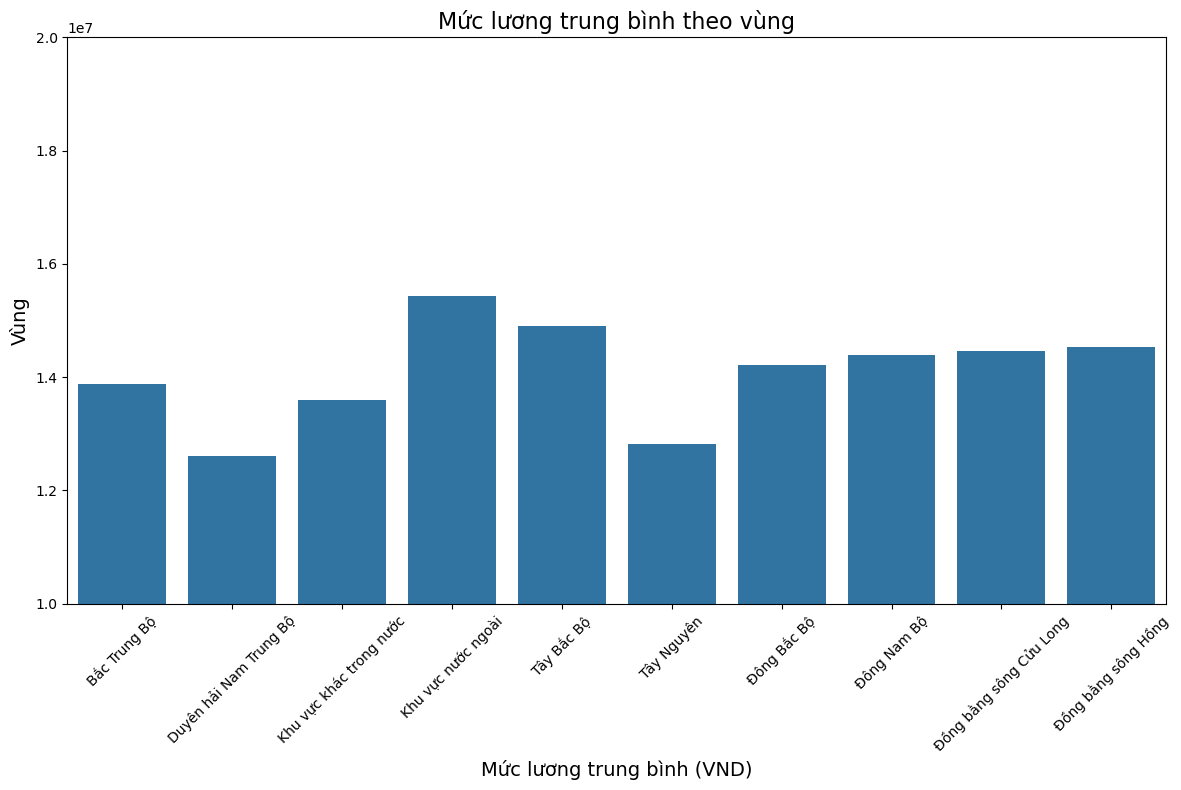

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_salary,
    y='Average Salary',
    x='Region',
)
plt.title('Mức lương trung bình theo vùng', fontsize=16)
plt.ylabel('Vùng', fontsize=14)
plt.xlabel('Mức lương trung bình (VND)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(10000000, 20000000)
plt.tight_layout()
plt.show()

Nhận xét:
- Khu vực nước ngoài có mức lương trung bình cao nhất, gần 15,4 triệu VNĐ, cao vượt trội so với các vùng khác.
- Duyên hải Nam Trung Bộ và Tây Nguyên có mức lương trung bình thấp nhất, chỉ khoảng 12,6 - 12,8 triệu VNĐ.
- Các vùng như Đồng bằng sông Hồng, Đồng bằng sông Cửu Long, Đông Bắc Bộ, và Đông Nam Bộ đều có mức lương tương đối đồng đều, khoảng 14,5 triệu VNĐ.

=> Như vậy các khu vực đô thị, có đầu tư nước ngoài hoặc hội nhập quốc tế có mức lương cao hơn đáng kể. Còn các vùng kinh tế chưa phát triển hoặc nặng về nông nghiệp có mức lương trung bình thấp hơn.

#### 1.2 Câu hỏi 2 <a id="ii1b"></a>

##### Mức lương trung bình theo ngành nghề và cấp bậc là bao nhiêu?

- Lợi ích khi trả lời câu hỏi: Dưới góc độ của một sinh viên nói riêng và những người tìm việc nói chung có thể dựa vào mức lương trung bình để lựa chọn các ngành nghề có tiềm năng phát triển và mức thu nhập cao. Ngoài ra, người lao động có thể sử dụng mức lương trung bình theo ngành nghề và cấp bậc làm tham chiếu khi đàm phán lương với nhà tuyển dụng. Còn đối với các doanh nghiệp, họ sẽ xây dựng được các chính sách lương, thưởng phù hợp với từng cấp bậc và ngành nghề giúp đảm bảo tính cạnh tranh trên thị trường lao động và thu hút nhân tài. Ngoài ra, doanh nghiệp có thể sử dụng thông tin này để tối ưu chi phí nhân sự và đầu tư vào các ngành có tỷ suất lợi nhuận cao.

In [15]:
# Xử lý cột 'Industry': Trong cột Industry, một công việc tuyển dụng có thể thuộc nhiều ngành nghề khác nhau, tách các ngành nghề ra thành các dòng riêng biệt bằng dấu phẩy
# Tách các ngành nghề bằng dấu phẩy thành danh sách
df_salary_defined['Industry'] = df_salary_defined['Industry'].str.split(',')

# Chuyển đổi các danh sách thành các dòng riêng biệt
df_salary_defined = df_salary_defined.explode('Industry')

# Loại bỏ khoảng trắng dư thừa
df_salary_defined['Industry'] = df_salary_defined['Industry'].str.strip()

# Tính mức lương trung bình theo ngành nghề
avg_salary_industry = df_salary_defined.groupby('Industry')['Salary'].mean().reset_index()
avg_salary_industry.rename(columns={'Salary': 'Average_Salary'}, inplace=True)

# Tính mức lương trung bình theo cấp bậc
avg_salary_job_level = df_salary_defined.groupby('Job Level')['Salary'].mean().reset_index()
avg_salary_job_level.rename(columns={'Salary': 'Average_Salary'}, inplace=True)

Trực quan hóa

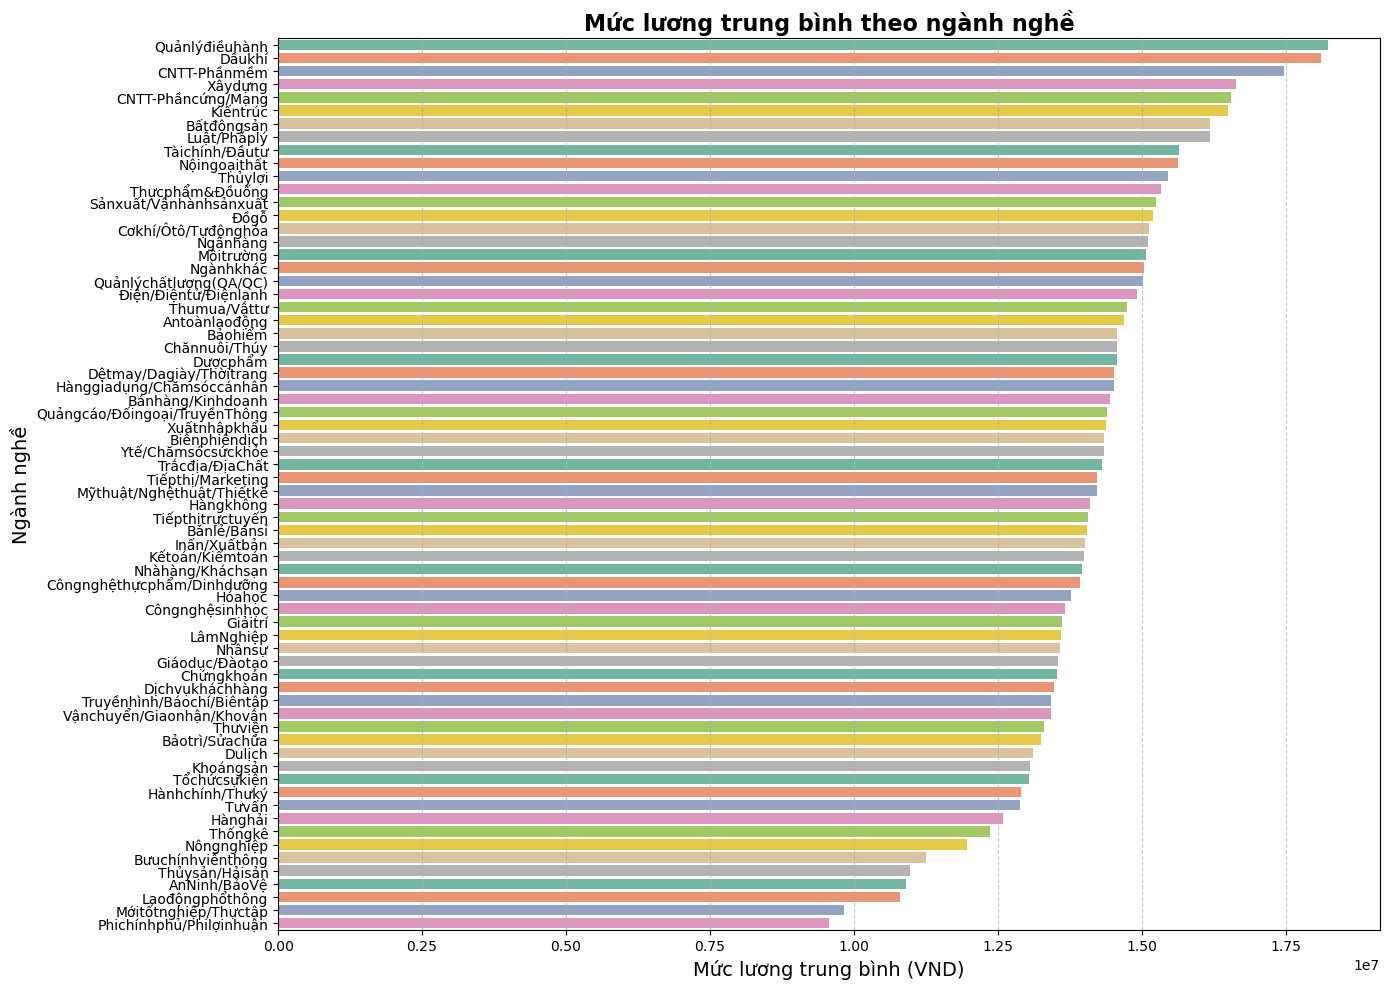

In [16]:
# Mức lương trung bình theo ngành nghề
plt.figure(figsize=(14, 10))
sns.set_palette('Set2')
sns.barplot(
    data=avg_salary_industry.sort_values('Average_Salary', ascending=False),
    x='Average_Salary',
    y='Industry',
    hue='Industry',
    palette='Set2'
)
plt.legend([], [], frameon=False)

plt.title('Mức lương trung bình theo ngành nghề', fontsize=16, weight='bold')
plt.xlabel('Mức lương trung bình (VND)', fontsize=14)
plt.ylabel('Ngành nghề', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nhận xét:

- Quản lý điều hành đứng đầu với mức lương trung bình cao nhất, vượt 18 triệu VNĐ.
- Dầu khí và CNTT - Phần mềm lần lượt đứng thứ hai và ba, gần sát mức cao nhất.

=> Đây là các ngành yêu cầu trình độ chuyên môn cao, cần nhiều kinh nghiệm quản lý hoặc kỹ thuật, và có tiềm năng phát triển lớn. Và cũng là các ngành 'hot' nhất bây giờ

- Các ngành như Xây dựng, Kiến trúc, Ngân hàng, và Luật/Pháp lý có mức lương từ 12 - 15 triệu VNĐ, cho thấy đây là nhóm ngành có nhu cầu lao động ổn định và thu nhập ở mức khá ổn.
- Phi chính phủ/Philanthropy, Môi trường, và Thực tập có mức lương thấp nhất, dưới 10 triệu VNĐ.

=> Đây thường là các công việc bán thời gian, thuộc khối ngành phi lợi nhuận, không yêu cầu tính chuyên môn nên mức lương ở mức thấp.


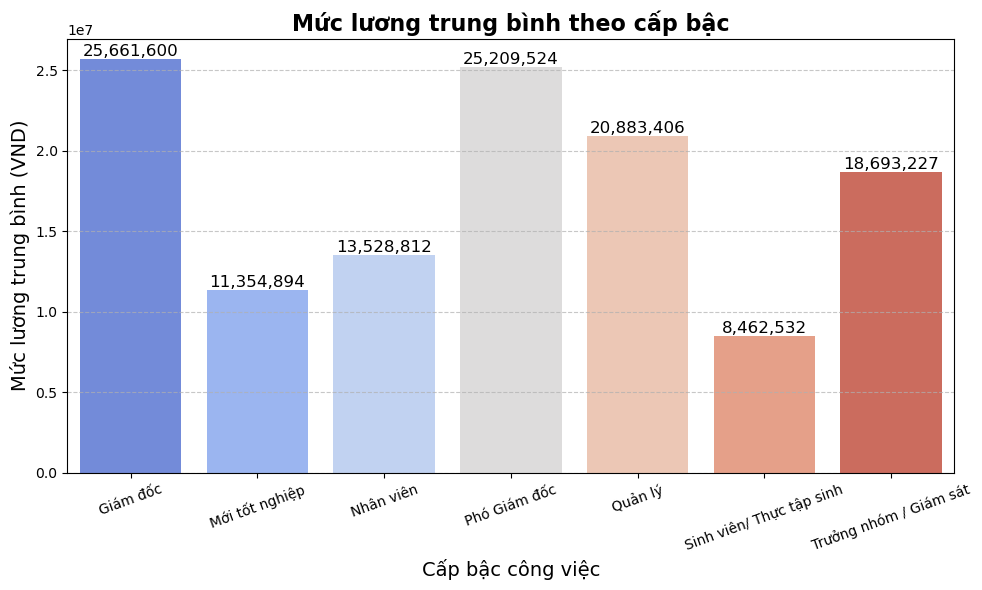

In [17]:
# Mức lương trung bình theo cấp bậc
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_salary_job_level,
    x='Job Level',
    y='Average_Salary',
    hue='Job Level',
    palette='coolwarm',
    dodge=False
)

plt.legend([], [], frameon=False)
plt.title('Mức lương trung bình theo cấp bậc', fontsize=16, weight='bold')
plt.xlabel('Cấp bậc công việc', fontsize=14)
plt.xticks(rotation=20)
plt.ylabel('Mức lương trung bình (VND)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị mức lương trên mỗi thanh
for index, value in enumerate(avg_salary_job_level['Average_Salary']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Nhận xét:
- Cấp bậc Giám đốc có mức lương trung bình cao nhất, vượt trội hơn so với các cấp bậc khác. Phó Giám đốc đứng thứ hai với mức lương trung bình tương đối sát với Giám đốc, cho thấy mức lương của hai vị trí cấp cao khá gần nhau. Điều này cũng phản ánh trách nhiệm lớn hơn và yêu cầu kỹ năng quản lý chuyên sâu.
- Quản lý có mức lương trung bình cao thứ ba, cách biệt đáng kể với nhóm Trưởng nhóm/Giám sát.
- Với nhóm lao động phổ thông như nhân viên, mức lương cơ bản ổn định trong thị trường.
- Lao động thuộc cấp bậc mới tốt nghiệp có mức lương trung bình tốt hơn hẳn Sinh viên/Thực tập sinh, cho thấy chênh lệch rõ ràng giữa người đã tốt nghiệp và người đang trong giai đoạn thực tập. Sinh viên/Thực tập sinh có mức lương trung bình thấp nhất, do đặc thù công việc mang tính học hỏi, trải nghiệm hơn là lao động chính thức.

=> Cấp bậc công việc có ảnh hưởng mạnh mẽ đến mức lương trung bình, với sự khác biệt rõ rệt giữa các cấp bậc.

#### 1.3 Câu hỏi 3 <a id="ii1c"></a>

##### Kinh nghiệm và cấp bậc có tác động như thế nào đến mức lương?

Lợi ích khi trả lời câu hỏi: Giúp người lao động nhận ra mối liên hệ rõ ràng giữa kinh nghiệm làm việc và mức lương. Việc trả lời câu hỏi còn cung cấp thông tin về thời điểm cụ thể (ví dụ 10 năm kinh nghiệm) khi mức lương tăng mạnh hơn, do người lao động tích lũy đủ kỹ năng chuyên sâu hoặc thăng tiến lên cấp bậc cao hơn. Ngoài ra còn giúp người lao động hiểu rõ mức lương khác nhau giữa các vị trí như nhân viên, trưởng nhóm, quản lý, và giám đốc. Cấp bậc cao hơn không chỉ có lương khởi điểm cao mà còn có tốc độ tăng trưởng nhanh hơn khi tích lũy kinh nghiệm. Cuối cùng, việc nhận ra sự khác biệt về mức lương cho từng cấp bậc thúc đẩy người lao động đầu tư vào kỹ năng quản lý, lãnh đạo và kỹ thuật để đạt vị trí cao hơn.


In [18]:
# Tính hệ số tương quan giữa kinh nghiệm và mức lương
correlation = df_salary_defined[['Experience', 'Salary']].corr()
print(correlation)

# Tính mức lương trung bình theo kinh nghiệm và cấp bậc
avg_salary_experience = df_salary_defined.groupby('Experience')['Salary'].mean().reset_index()
avg_salary_job_level_experience = df_salary_defined.groupby(['Job Level', 'Experience'])['Salary'].mean().reset_index()

print(avg_salary_experience)
print(avg_salary_job_level_experience)

            Experience    Salary
Experience    1.000000  0.524443
Salary        0.524443  1.000000
    Experience        Salary
0            0  1.157908e+07
1            1  1.285544e+07
2            2  1.616629e+07
3            3  1.938179e+07
4            4  2.103878e+07
5            5  2.194834e+07
6            6  2.628571e+07
7            7  2.331250e+07
8            8  2.516667e+07
9           10  2.506667e+07
10          15  2.500000e+07
11          30  3.000000e+07
                   Job Level  Experience        Salary
0                   Giám đốc           1  2.358571e+07
1                   Giám đốc           2  2.563000e+07
2                   Giám đốc           3  2.502667e+07
3                   Giám đốc           4  2.500000e+07
4                   Giám đốc           5  2.640192e+07
5             Mới tốt nghiệp           0  1.135489e+07
6                  Nhân viên           0  1.206941e+07
7                  Nhân viên           1  1.256925e+07
8                  Nhân viên 

Vì hệ số tương quan giữa yếu tố kinh nghiệm và mức lương cao (0.52) nên tiến hành trực quan hóa

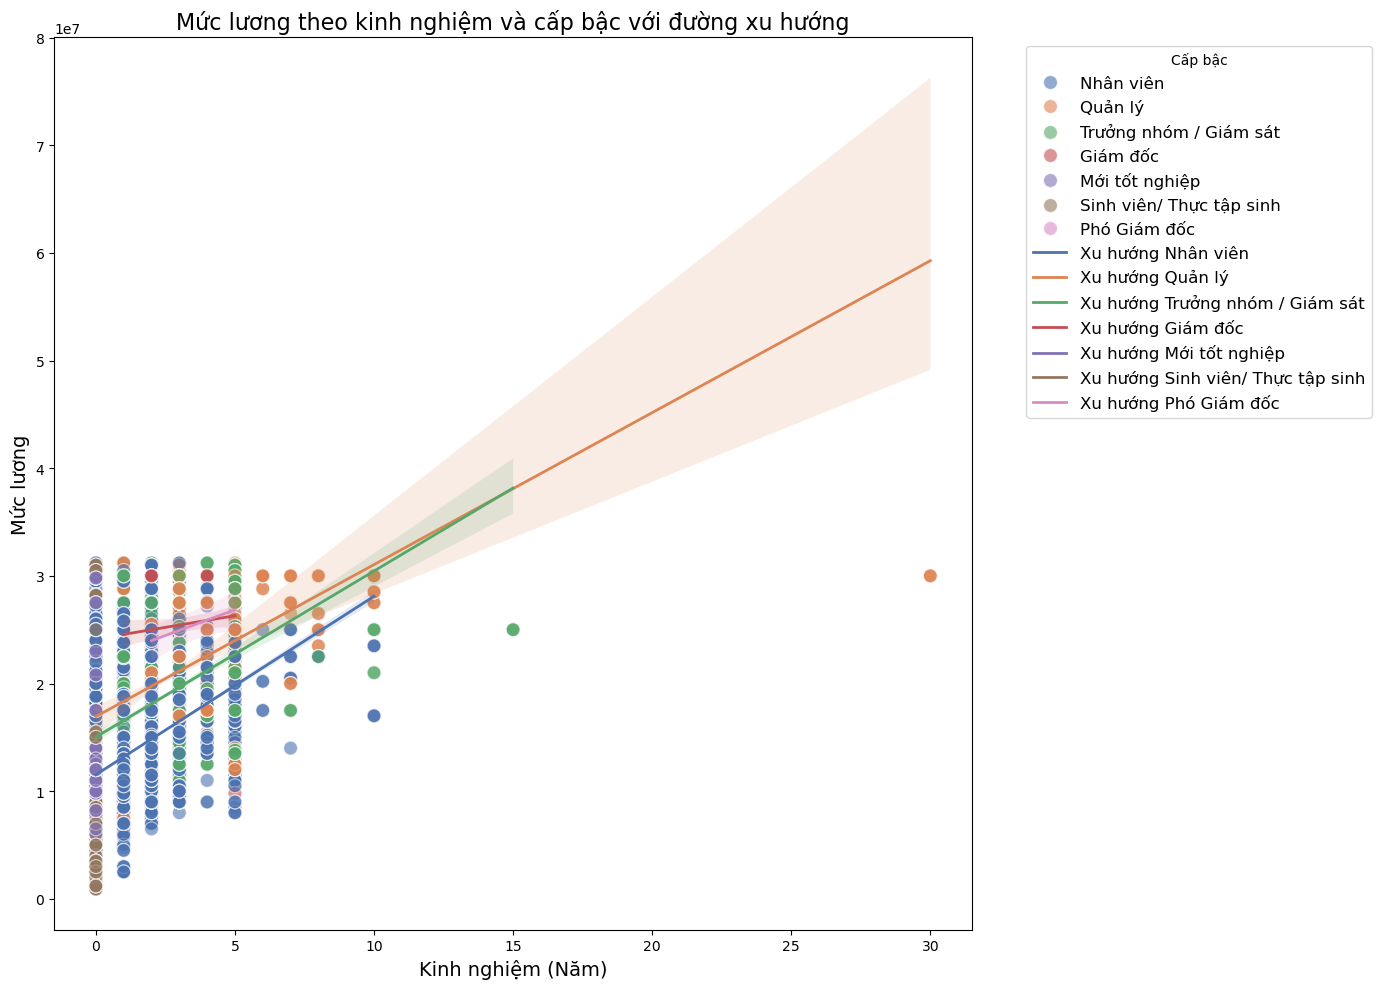

In [19]:
plt.figure(figsize=(14,10))

# Vẽ các điểm dữ liệu
sns.scatterplot(
    data=df_salary_defined,
    x='Experience',
    y='Salary',
    hue='Job Level',
    palette='deep',
    alpha=0.6,
    edgecolor='w',
    s=100
)

# Thêm đường xu hướng cho từng cấp bậc
job_levels = df_salary_defined['Job Level'].unique()
for level in job_levels:
    subset = df_salary_defined[df_salary_defined['Job Level'] == level]
    sns.regplot(
        data=subset,
        x='Experience',
        y='Salary',
        scatter=False,
        label=f'Xu hướng {level}',
        color=sns.color_palette('deep')[list(job_levels).index(level)],
        line_kws={'linewidth':2}
    )

plt.title('Mức lương theo kinh nghiệm và cấp bậc với đường xu hướng', fontsize=16)
plt.xlabel('Kinh nghiệm (Năm)', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.legend(title='Cấp bậc', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ phân tán cho thấy mối quan hệ giữa kinh nghiệm làm việc và mức lương, phân biệt theo cấp bậc. Dựa vào độ dốc của các đường xu hướng, ta thấy rõ được các cấp bậc cao hơn có xu hướng nhận mức lương cao hơn và tăng theo kinh nghiệm.

#### 1.4 Câu hỏi 4 <a id="ii1d"></a>

##### Liệu có bằng ngoại ngữ sẽ giúp ta cải thiện mức lương trong công việc? Phải chăng người có trình độ học vấn khác nhau sẽ nhận được mức lương khác nhau?

- Lợi ích khi trả lời câu hỏi: Giúp sinh viên chúng ta nói riêng và toàn bộ lao động nói chung hiểu rõ được tầm quan trọng của ngoại ngữ trong công việc (giao tiếp, đàm phán, trao đổi thông tin, nắm thế chủ động trong thương trường...), sở hữu ngoại ngữ (như tiếng Anh, Trung Quốc, Nhật Bản,...) giúp người lao động tiếp cận các cơ hội việc làm quốc tế hoặc doanh nghiệp nước ngoài, nơi trả lương cao hơn. để từ đó giúp cá nhân có ý thức đầu tư vào kỹ năng ngoại ngữ để tăng giá trị bản thân ngay từ khi còn sớm, phù hợp nhất là trong giai đoạn còn đang đi học. Chưa hết, giúp thấy rõ học vấn càng cao đi kèm với ngoại ngữ sẽ tạo ra thu nhập vượt trội như thế nào. Ngoài ra còn cung cấp cơ sở dữ liệu cho đàm phán lương công bằng và minh bạch hơn.

In [20]:
# Định nghĩa lại mapping cho Education Levels
education_mapping = {
    0: 'Không xác định',
    1: 'Trung học',
    2: 'Trung cấp',
    3: 'Cao đẳng/College',
    4: 'Đại học/Bachelor’s degree/University',
    5: 'Sau đại học/Master’s degree/PHD'
}

# Áp dụng mapping
df_salary_defined['Education Levels'] = df_salary_defined['Education Levels'].map(education_mapping)

In [21]:
# Tính mức lương trung bình theo trình độ học vấn
avg_salary_education = df_salary_defined.groupby('Education Levels')['Salary'].mean().reset_index()
print(avg_salary_education)

                       Education Levels        Salary
0                      Cao đẳng/College  1.408722e+07
1                        Không xác định  1.213406e+07
2                             Trung cấp  1.214095e+07
3                             Trung học  1.128991e+07
4  Đại học/Bachelor’s degree/University  1.698858e+07


In [22]:
# Tính mức lương trung bình theo yêu cầu ngôn ngữ
avg_salary_language = df_salary_defined.groupby('Language requirement')['Salary'].mean().reset_index()
print(avg_salary_language)

   Language requirement        Salary
0                     0  1.392492e+07
1                     1  1.570679e+07


Trực quan hóa

<Axes: xlabel='Language requirement', ylabel='Salary'>

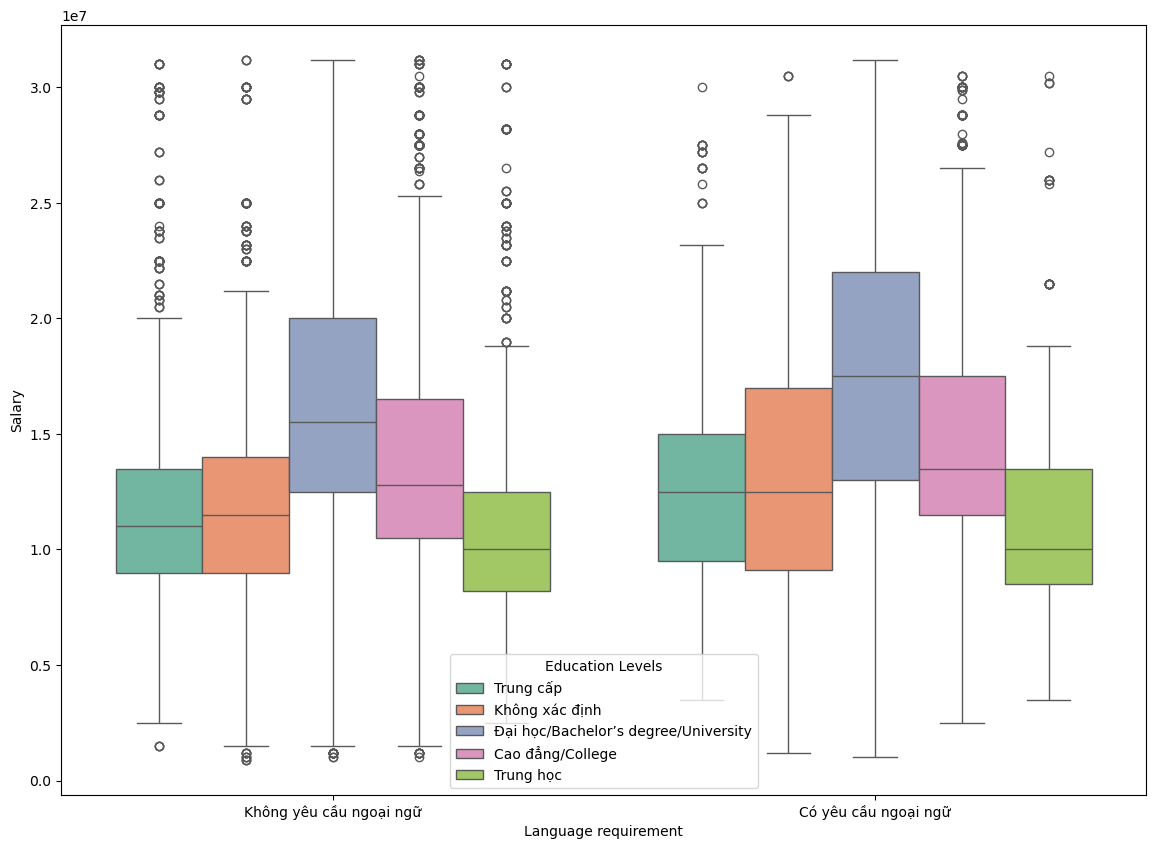

In [23]:
# Biểu đồ hộp phân phối mức lương theo Language Requirement và Education Levels
df_salary_defined['Language requirement'] = df_salary_defined['Language requirement'].map({0: "Không yêu cầu ngoại ngữ", 1: "Có yêu cầu ngoại ngữ"})

plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_salary_defined,
    x='Language requirement',
    y='Salary',
    hue='Education Levels',
    palette='Set2'
)

Nhận xét:

1. Ảnh hưởng của ngoại ngữ 

Đối với những công việc có yêu cầu ngoại ngữ:
- Mức lương trung bình và trung vị cao hơn rõ rệt so với nhóm không yêu cầu ngoại ngữ.
- Phân phối mức lương rộng hơn, với nhiều điểm ngoại lai ở mức lương cao. Đặc biệt, những người có bằng Đại học và Cao đẳng có mức lương cao hơn đáng kể.

Đối với những công việc không yêu cầu ngoại ngữ:
- Mức lương trung bình và trung vị thấp hơn.
- Phân phối hẹp hơn, ít điểm ngoại lai ở mức lương cao.

=> Như vậy, ngoại ngữ là một yếu tố giúp tăng mức lương đáng kể, đặc biệt đối với người có trình độ học vấn cao.

2. Ảnh hưởng của trình độ học vấn:

- Bằng Đại học: Có mức lương trung bình cao nhất trong cả 2 nhóm (có và không yêu cầu ngoại ngữ). Khi có yêu cầu ngoại ngữ, mức lương tăng mạnh với trung vị nằm gần 20 triệu VNĐ và nhiều ngoại lai ở mức trên 30 triệu VNĐ.
- Cao đẳng: Mức lương trung bình và trung vị khá tốt, nhưng thấp hơn nhóm Đại học. Dễ dàng thấy được sự khác biệt lớn giữa nhóm có và không yêu cầu ngoại ngữ.
- Trung học và Trung cấp: Nhóm này có mức lương trung bình và trung vị thấp hơn rõ rệt. Sự cải thiện lương khi có ngoại ngữ là không đáng kể, cho thấy kỹ năng ngoại ngữ ảnh hưởng mạnh hơn ở nhóm có trình độ cao hơn.

=> Biểu đồ nhấn mạnh tầm quan trọng của trình độ học vấn cao và kỹ năng ngoại ngữ trong việc tăng khả năng thu nhập trên thị trường lao động.

##### Kết luận (trả lời câu hỏi)

Từ những nhận xét nói trên, ta rút ra được những yếu tố ảnh hưởng đến mức lương bao gồm: 

- Địa điểm làm việc: làm việc ở các khu vực đô thị, các thành phố lớn nơi có đầu tư nước ngoài hoặc hội nhập quốc tế sẽ mang lại nhiều cơ hội việc làm và cung cấp mức lương cao hơn 
- Ngành nghề: tùy vào từng thời đại mà một số ngành nghề chiếm ưu thế trên thị trường việc làm,  bởi nhu cầu ngày càng tăng cao của người dân khiến một số ngành, nghề được ưa chuộng hơn
- Cấp bậc: điều này hoàn toàn dễ thấy vì cấp bậc càng cao càng có cơ hội nhận được mức lương cao hơn
- Số năm kinh nghiệm: hoàn toàn dễ thấy vì càng nhiều kinh nghiệm chuyên sâu thì càng được trọng dụng, từ đó được quyền đòi hỏi mức lương cao hơn
- Bằng ngoại ngữ: có bằng ngoại ngữ luôn luôn là một lợi thế rõ rệt trong bất kỳ lĩnh vực nào.

### 2. Vấn đề 2: Xu hướng tuyển dụng <a id="ii2"></a>

##### Phân tích xu hướng tuyển dụng theo thời gian và địa điểm

#### 2.1 Câu hỏi 1 <a id="ii2a"></a>

##### Số Lượng vị trí tuyển dụng trong năm 2024 có xu hướng thay đổi như thế nào?
- Lợi ích khi trả lời câu hỏi: Dưới góc độ nhà tuyển dụng, xây dựng được kế hoạch tuyển dụng hợp lý để đáp ứng nhu cầu lao động trong những thời điểm cao điểm mà không làm quá tải ngân sách. Dự trù nguồn lực tuyển dụng (như đội ngũ nhân sự, ngân sách quảng cáo tuyển dụng) cho các giai đoạn cần thiết. Còn đối với người tìm việc: Nhận diện được thời điểm phù hợp để tìm kiếm việc làm, đặc biệt là những tháng có nhiều vị trí được mở. Tăng cơ hội ứng tuyển thành công khi hiểu rõ giai đoạn tuyển dụng sôi động nhất.

In [24]:
# In ra só lượng các giá trị của cột Update Date_month
print(df['Update Date_month'].value_counts())

Update Date_month
11    14705
10     2480
12     1769
Name: count, dtype: int64


In [25]:
# Đếm số lượng công việc theo vùng
location_trends = df.groupby(['Region'], observed=True)['Job Name'].count().reset_index(name='Job Count') 

# Chỉ lấy các ngày trong tháng 10
october_data = df[df['Update Date_month'] == 10]
# Tính tổng số vị trí tuyển dụng theo ngày trong tháng 10 vừa qua
monthly_10_trends = october_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

# Tương tự cho tháng 11
november_data = df[df['Update Date_month'] == 11]
monthly_11_trends = november_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

# Tương tụ cho tháng 12
december_data = df[df['Update Date_month'] == 12]
monthly_12_trends = december_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

Trực quan hóa

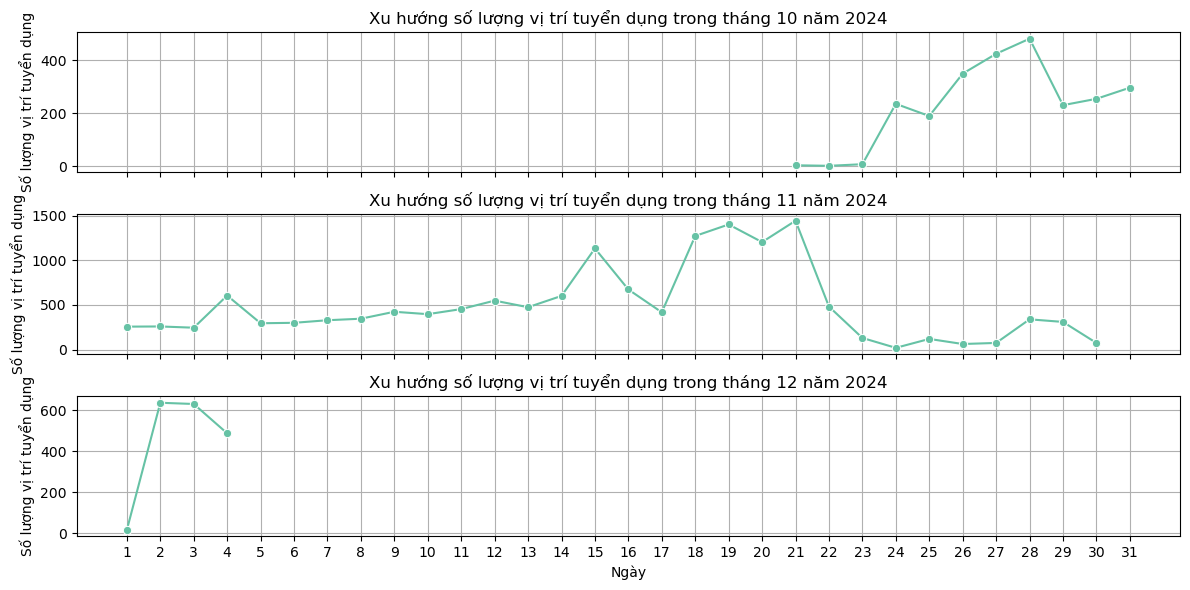

In [26]:
# Biểu đồ đường cho xu hướng theo thời gian
fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

# Biểu đồ tháng 10
sns.lineplot(ax=axes[0], data=monthly_10_trends, x='Update Date_day', y='Job Count', marker='o')
axes[0].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 10 năm 2024')
axes[0].set_xlabel('Ngày')
axes[0].set_ylabel('Số lượng vị trí tuyển dụng')
axes[0].set_xticks(range(1, 32))
axes[0].grid(True)

# Biểu đồ tháng 11
sns.lineplot(ax=axes[1], data=monthly_11_trends, x='Update Date_day', y='Job Count', marker='o')
axes[1].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 11 năm 2024')
axes[1].set_xlabel('Ngày')
axes[1].set_ylabel('Số lượng vị trí tuyển dụng')
axes[1].set_xticks(range(1, 31))
axes[1].grid(True)

# Biểu đồ tháng 12
sns.lineplot(ax=axes[2], data=monthly_12_trends, x='Update Date_day', y='Job Count', marker='o')
axes[2].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 12 năm 2024')
axes[2].set_xlabel('Ngày')
axes[2].set_ylabel('Số lượng vị trí tuyển dụng')
axes[2].set_xticks(range(1, 32))
axes[2].grid(True)

plt.tight_layout()
plt.show()

Với bộ dữ liệu mà nhóm có, các dòng dữ liệu với cột Update Date_month chỉ mang giá trị của 3 tháng vừa qua là tháng 10, 11, 12 (tuy nhiên hiện tại chưa hết tháng 12) vì nội dung các bài đăng tải trên trang web chỉ hiển thị trong phạm vi từ ngày 21/10 đến 4/12 (tức trong 3 tháng gần nhất) -> tùy vào thời điểm thu thập dữ liệu mà khoảng thời gian có thể thay đổi

=> Vì vậy qua trực quan và phân tích, nhóm không thể thấy được xu hướng tuyển dụng giữa các tháng trong năm 2024

#### 2.2 Câu hỏi 2 <a id="ii2b"></a>

##### Sự phân bố vị trí tuyển dụng theo địa điểm trong các thành phố lớn và các tỉnh lẻ như thế nào?

- Lợi ích khi trả lời câu hỏi: Trả lời câu hỏi giúp thấy được sự chênh lệch trong cơ hội việc làm giữa các khu vực. Từ đó sẽ giúp người lao động ở tỉnh lẻ cân nhắc việc di chuyển đến các thành phố lớn để tìm kiếm cơ hội việc làm tốt hơn. Đồng thời khuyến khích người lao động tại thành phố lớn tận dụng lợi thế cạnh tranh của mình để phát triển nghề nghiệp. Còn đối với nhà tuyển dụng, trả lời câu hỏi sẽ giúp các doanh nghiệp hiểu rõ nhu cầu lao động tại mỗi khu vực, từ đó điều chỉnh kế hoạch tuyển dụng phù hợp. Các công ty tại tỉnh lẻ có thể xây dựng chính sách thu hút nhân tài (như mức lương cạnh tranh, phúc lợi tốt hơn) để giảm sự di cư lao động ra thành phố lớn.

In [27]:
# Định nghĩa danh sách thành phố lớn
large_cities = ['Hà Nội', 'Thành phố Hồ Chí Minh']

# Phân loại địa điểm
df['Location Type'] = df['Location'].apply(lambda x: 'Thành phố lớn' if x in large_cities else 'Tỉnh lẻ')

# Tính tổng số vị trí tuyển dụng theo loại địa điểm và địa điểm cụ thể
location_trends = df.groupby(['Location Type'])['Job Name'].count().reset_index(name='Job Count')

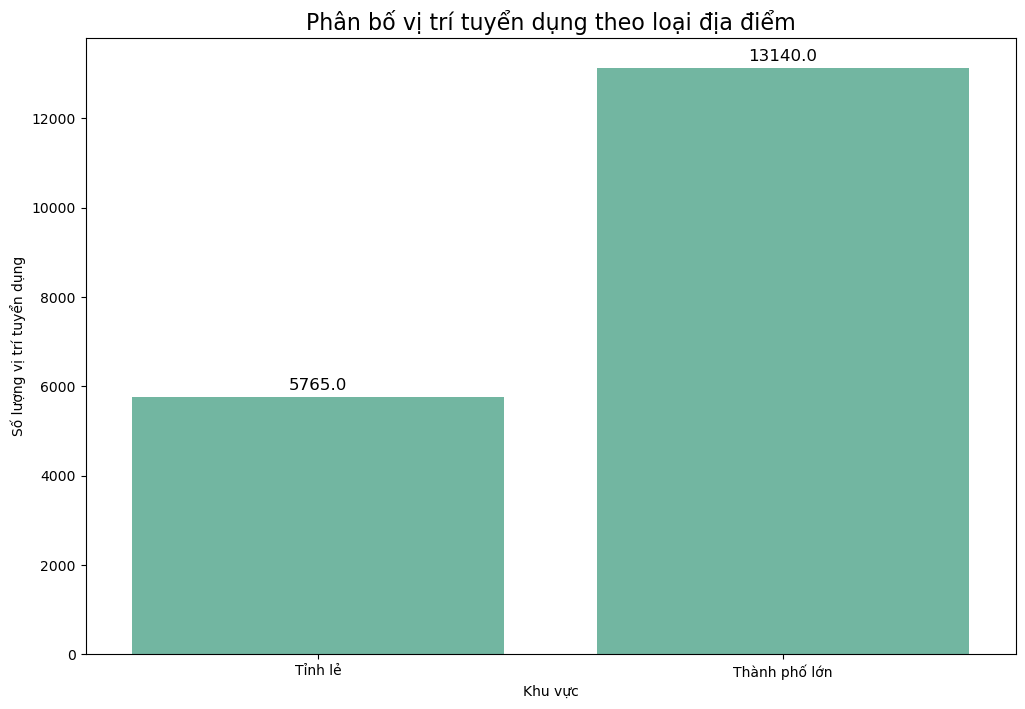

In [28]:
# Biểu đồ cột nhóm cho phân bố theo vùng
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Location Type')
plt.title('Phân bố vị trí tuyển dụng theo loại địa điểm', fontsize=16)
plt.xlabel('Khu vực')
plt.ylabel('Số lượng vị trí tuyển dụng')

# Thêm số đếm trên đầu mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

Nhận xét:

- ở các thành phố lớn, có 13,140 vị trí tuyển dụng, gấp hơn 2 lần so với Tỉnh lẻ. Điều này cho thấy thành phố lớn là trung tâm tập trung lao động và cơ hội việc làm cao hơn đáng kể so với các khu vực tỉnh lẻ. Còn ở các tỉnh lẻ, với số lượng vị trí tuyển dụng chỉ chiếm khoảng 30-40% tổng số vị trí tuyển dụng. Thể hiện rõ sự mất cân bằng trong phân bổ cơ hội việc làm giữa các khu vực.

##### Kết luận (trả lời câu hỏi)

Từ các nhận xét trên, ta chỉ có thể khẳng định rằng sự chênh lệch trong cơ hội việc làm giữa Thành phố lớn và tỉnh lẻ đến từ việc tập trung nhiều các doanh nghiệp, khu công nghiệp, và các dự án lớn, dẫn đến nhu cầu tuyển dụng cao hơn ở các thành phố lớn như Hà Nội, TP.HCM,... Đối với các tỉnh lẻ thì có ít cơ hội hơn, chủ yếu tập trung vào các ngành nông nghiệp, sản xuất nhỏ lẻ hoặc công việc thủ công.

Ta có thể dự đoán xu hướng dịch chuyển lao động từ tỉnh lẻ lên thành phố lớn để tìm kiếm việc làm. Đây là dấu hiệu của quá trình đô thị hóa và sự tập trung kinh tế tại các đô thị lớn.

### 3. Vấn đề 3: Welfare (Phúc lợi) <a id="ii3"></a>

##### Phân tích các gói phúc lợi và sự ảnh hưởng của nó đến với các yếu tố khác

In [29]:
# Xóa các dòng mang giá trị 'Not specified' trong cột 'Employment Type'
df_welfare = df[df['Welfare'] != 'not_specified']

#### 3.1 Câu hỏi 1 <a id="ii3a"></a>

##### Các gói phúc lợi nào được cung cấp phổ biến nhất trong các vị trí tuyển dụng?

- Lợi ích khi trả lời câu hỏi: giúp hiểu rõ nhu cầu thị trường lao động. Đối với người lao động, họ có thể xác định các gói phúc lợi phổ biến để chọn lựa nhà tuyển dụng phù hợp với mong đợi của mình. Đối với nhà tuyển dụng, việc trả lời câu hỏi giúp doanh nghiệp hiểu được xu hướng thị trường để xây dựng gói phúc lợi cạnh tranh.

In [30]:
# Tách các phúc lợi bằng dấu phẩy thành danh sách
df_welfare.loc[:, 'Welfare'] = df_welfare['Welfare'].str.split(',')

# Chuyển đổi các danh sách thành các dòng riêng biệt
df_welfare = df_welfare.explode('Welfare')

# Loại bỏ khoảng trắng dư thừa (nếu có) và đảm bảo các tên phúc lợi không có lỗi chính tả
df_welfare['Welfare'] = df_welfare['Welfare'].str.strip()

# Tính tổng số lần mỗi gói phúc lợi xuất hiện
welfare_counts = df_welfare['Welfare'].value_counts().reset_index()
welfare_counts.columns = ['Welfare', 'Count']
print(welfare_counts)

                   Welfare  Count
0                insurance  17764
1                    bonus  17721
2                 training  17677
3          salary_increase  17020
4                   travel  15398
5               healthcare  15397
6             annual_leave  13839
7                allowance  11760
8                  uniform   8670
9   business_trip_expenses   8174
10                  laptop   6305
11     allowance thâm niên   5258
12             sports_club   3001
13         overseas_travel   2115
14         shuttle_service   2044


Trực quan hóa

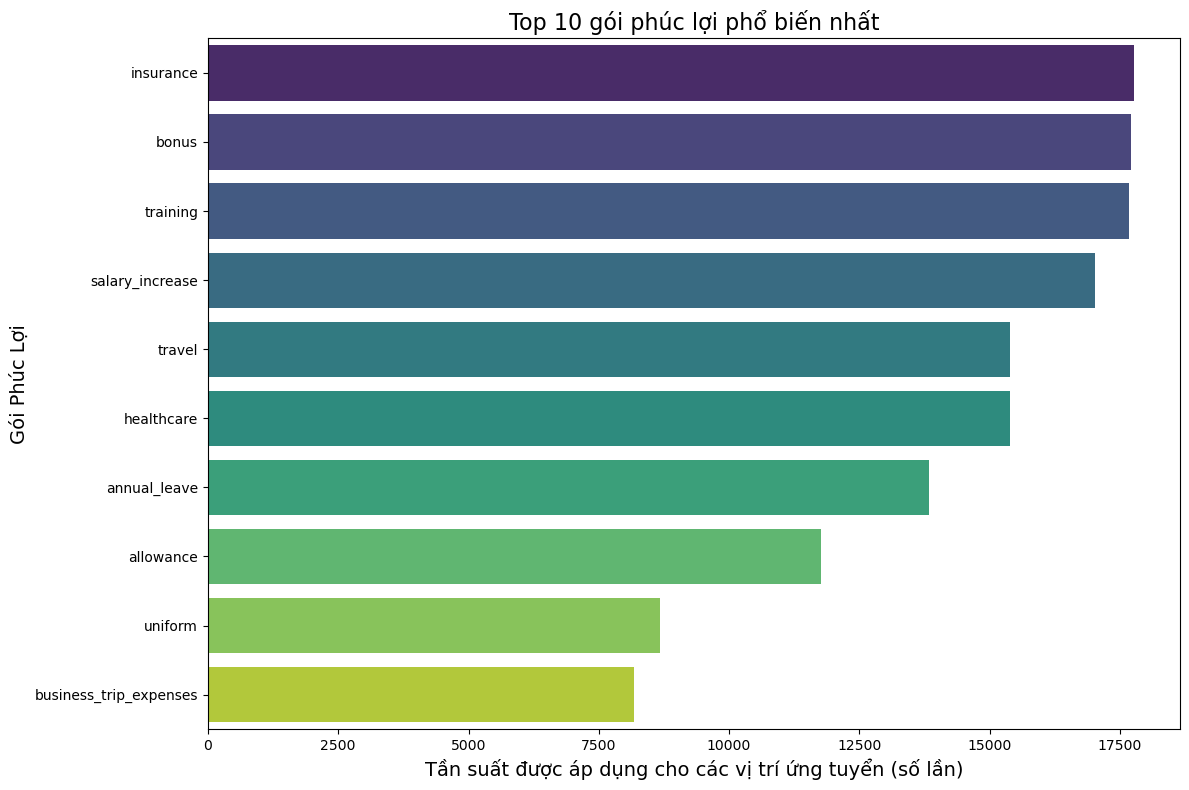

In [31]:
# Chọn Top 10 phúc lợi phổ biến nhất 
top_n = 10
top_welfare = welfare_counts.head(top_n)

plt.figure(figsize=(12,8))
sns.barplot(
    data=top_welfare, 
    x='Count', 
    y='Welfare', 
    hue='Welfare',
    palette='viridis',
    dodge=False
)

plt.title(f'Top {top_n} gói phúc lợi phổ biến nhất', fontsize=16)
plt.xlabel('Tần suất được áp dụng cho các vị trí ứng tuyển (số lần)', fontsize=14)
plt.ylabel('Gói Phúc Lợi', fontsize=14)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Nhận xét:

- Insurance (Bảo hiểm) là gói phúc lợi phổ biến nhất. Đây là phúc lợi cơ bản, thường được cung cấp bởi hầu hết các doanh nghiệp để đảm bảo quyền lợi cho nhân viên (bảo hiểm xã hội, y tế, bảo hiểm thất nghiệp). Theo sau là Bonus, Salary Increase (Tăng lương), thưởng là động lực quan trọng trong việc khuyến khích hiệu suất làm việc và giữ chân nhân viên. Training (Đào tạo) cũng xếp ở vị thứ cao, điều này cho thấy nhiều doanh nghiệp chú trọng vào việc nâng cao kỹ năng cho nhân viên thông qua đào tạo.
- Với những gói ít phổ biến hơn như Business Trip Expenses (Chi phí đi công tác), Uniform (Đồng phục), Allowance (Phụ cấp) có thể do đặc thù công việc, mỗi nghành mỗi nghề có yêu cầu thêm hay không. 
- Nhóm phúc lợi cơ bản gồm Insurance, Bonus, Salary Increase, và Healthcare (Chăm sóc sức khỏe). Đây là nhóm phúc lợi được áp dụng phổ biến nhất vì ảnh hưởng trực tiếp đến quyền lợi và mức sống của nhân viên.
- Nhóm phúc lợi nâng cao gồm Training đứng cao trong nhóm này, cho thấy sự quan tâm của doanh nghiệp đến phát triển nhân sự lâu dài. Travel (Du lịch) cũng khá phổ biến, phản ánh các doanh nghiệp thường có xu hướng tổ chức các hoạt động ngoại khóa và gắn kết đội ngũ.

#### 3.2 Câu hỏi 2 <a id="ii3b"></a>

##### Liệu phụ thuộc vào từng loại hình công việc mà các gói phúc lợi có thể khác nhau? Mối quan hệ giữa 2 đặc trưng này là gì?

- Lợi ích khi trả lời câu hỏi: Dưới góc độ các doanh nghiệp, hiểu được sự khác biệt về phúc lợi giúp doanh nghiệp xây dựng gói phúc lợi linh hoạt và tối ưu để phù hợp với từng loại hình công việc. Ví dụ: Đối với nhóm thực tập sinh, chú trọng phúc lợi đào tạo (training) sẽ hiệu quả hơn thay vì bảo hiểm y tế toàn diện. Ngoài ra, còn giúp tối ưu hóa ngân sách, đảm bảo phân bổ nguồn lực hợp lý cho các nhóm lao động khác nhau. Còn dưới góc độ người lao động, trả lời câu hỏi giúp người lao động hiểu rõ quyền lợi mà mình có thể nhận được dựa trên loại hình công việc. Điều này hỗ trợ họ lựa chọn công việc phù hợp với nhu cầu cá nhân (ví dụ: ưu tiên công việc chính thức để nhận bảo hiểm hoặc tìm kiếm các cơ hội thực tập để phát triển kỹ năng), đồng thời khuyến khích sự phát triển của các loại hình công việc đặc thù như bán thời gian hoặc thời vụ.

In [32]:
# Hàm tách các loại hình công việc trong chuỗi và trả về một danh sách
def extract_employtype(text):
    if pd.isnull(text):
        return []
    employtypes = [types.strip() for types in text.split(',')]
    return employtypes

# Phân tách và explode cột 'Employment Type'
df_welfare_expanded = df_welfare.copy()
df_welfare_expanded['Employment Type'] = df_welfare_expanded['Employment Type'].apply(extract_employtype)
df_welfare_expanded = df_welfare_expanded.explode('Employment Type')

# Tính tần suất các gói phúc lợi theo Employment Type
welfare_by_employment = df_welfare_expanded.groupby(['Employment Type', 'Welfare']).size().reset_index(name='Count')

# Tính tần suất và tỉ lệ
welfare_by_employment['Total'] = welfare_by_employment.groupby('Employment Type')['Count'].transform('sum')
welfare_by_employment['Percentage'] = welfare_by_employment['Count'] / welfare_by_employment['Total']
print("\nTần suất và tỉ lệ các gói phúc lợi theo Employment Type:")
print(welfare_by_employment)



Tần suất và tỉ lệ các gói phúc lợi theo Employment Type:
       Employment Type                 Welfare  Count   Total  Percentage
0           Internship               allowance    325    2868    0.113319
1           Internship     allowance thâm niên     54    2868    0.018828
2           Internship            annual_leave    159    2868    0.055439
3           Internship                   bonus    358    2868    0.124826
4           Internship  business_trip_expenses    126    2868    0.043933
5           Internship              healthcare    220    2868    0.076709
6           Internship               insurance    236    2868    0.082287
7           Internship                  laptop    124    2868    0.043236
8           Internship         overseas_travel     14    2868    0.004881
9           Internship         salary_increase    267    2868    0.093096
10          Internship         shuttle_service     23    2868    0.008020
11          Internship             sports_club     75 

pivot DataFrame sao cho Employment Type làm hàng, Welfare làm cột, và Percentage làm giá trị hiển thị trong Heatmap.

In [33]:
pivot_table = welfare_by_employment.pivot_table(
    index='Employment Type',
    columns='Welfare',
    values='Percentage',
    aggfunc='mean'
)

# Thay thế NaN bằng 0
pivot_table = pivot_table.fillna(0)

# Kiểm tra pivot_table
print(pivot_table)

Welfare             allowance  allowance thâm niên  annual_leave     bonus  \
Employment Type                                                              
Internship           0.113319             0.018828      0.055439  0.124826   
Official             0.071852             0.032760      0.086040  0.108859   
Part-time            0.071707             0.028905      0.071151  0.126737   
Seasonal/Freelance   0.075734             0.027821      0.078053  0.112828   

Welfare             business_trip_expenses  healthcare  insurance    laptop  \
Employment Type                                                               
Internship                        0.043933    0.076709   0.082287  0.043236   
Official                          0.050709    0.095238   0.110170  0.038777   
Part-time                         0.036687    0.087271   0.092273  0.033352   
Seasonal/Freelance                0.044049    0.087326   0.098145  0.051005   

Welfare             overseas_travel  salary_increase  sh

Trực quan hóa

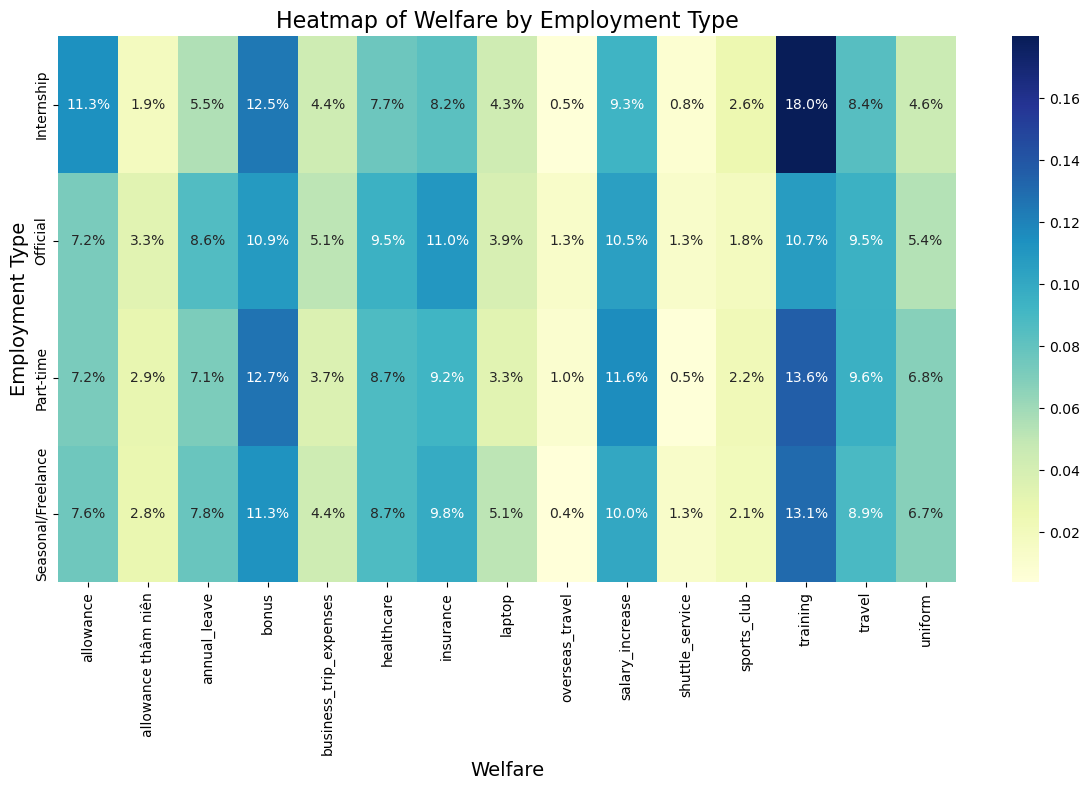

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title('Heatmap of Welfare by Employment Type', fontsize=16)
plt.xlabel('Welfare', fontsize=14)
plt.ylabel('Employment Type', fontsize=14)
plt.tight_layout()
plt.show()

Nhận xét:

- Đối với loại hình công việc chính thức (Official): Đây là nhóm nhận được các phúc lợi toàn diện nhất, với tỷ lệ áp dụng cao nhất ở hầu hết các phúc lợi như: Insurance (11.0%): Chiếm tỷ lệ cao, phản ánh yêu cầu bảo hiểm bắt buộc trong hợp đồng lao động chính thức. Bonus và Training: Các doanh nghiệp ưu tiên hỗ trợ đào tạo và thưởng cho nhân viên chính thức. Healthcare: Được áp dụng nhiều do sự quan tâm đến sức khỏe lâu dài của nhân viên.
- Loại hình thực tập (Internship): Nhóm này có tỷ lệ cao ở các phúc lợi như: Training: Cao nhất trong tất cả các loại phúc lợi, phản ánh mục tiêu chính là đào tạo và phát triển kỹ năng cho thực tập sinh. Bonus: Mặc dù là thực tập sinh, nhưng một số công ty vẫn có chính sách thưởng để khuyến khích hiệu suất làm việc.
- Loại hình bán thời gian (Part-time): Tỷ lệ áp dụng thấp hơn so với nhóm chính thức, nhưng vẫn có sự hiện diện ở các phúc lợi: Annual leave: Áp dụng trong các công việc bán thời gian ổn định. Training: Được chú trọng để nâng cao năng lực, tương tự nhóm thực tập.
- Loại hình thời vụ/tự do (Seasonal/Freelance): Nhận được ít phúc lợi hơn, chủ yếu tập trung vào các khoản hỗ trợ cơ bản như: Bonus: Thường áp dụng trong các công việc thời vụ ngắn hạn. Training: Phúc lợi được đánh giá cao nhằm đảm bảo nhân viên thời vụ thực hiện tốt nhiệm vụ. Allowance: Hỗ trợ thêm cho các công việc không cố định.

=> Ta thấy rõ được sự ưu tiên phúc lợi cho nhóm nhân viên chính thức, phản ánh sự khác biệt về mức độ cam kết lao động giữa các loại hình. Các công ty coi trọng đào tạo thực tập sinh (Training 18%) như một cách để phát triển nhân tài dài hạn. Nhóm Seasonal/Freelance có ít phúc lợi hơn, phản ánh tính ngắn hạn của loại hình công việc này.

#### 3.3 Câu hỏi 3 <a id="ii3c"></a>

##### Sự đa dạng của các gói phúc lợi được cung cấp bởi các ngành nghề khác nhau được thể hiện như thế nào?

In [35]:
# Tính đa dạng các gói phúc lợi theo ngành nghề
df_welfare['Industry'] = df_welfare['Industry'].str.split(',')
df_welfare_exploded = df_welfare.explode('Industry')

# Mã hóa các gói phúc lợi thành các cột nhị phân
welfare_encoded = pd.get_dummies(df_welfare_exploded['Welfare'])
welfare_diversity = welfare_encoded.groupby(df_welfare_exploded['Industry']).sum()

# Tính tổng số gói phúc lợi khác nhau cho mỗi ngành
welfare_diversity['Total Welfare'] = (welfare_diversity > 0).sum(axis=1)
welfare_diversity_sorted = welfare_diversity.sort_values(by='Total Welfare', ascending=False)
print(welfare_diversity_sorted.head())

                      allowance  allowance thâm niên  annual_leave  bonus  \
Industry                                                                    
AnNinh/BảoVệ                 45                   29            46     63   
Laođộngphổthông             116                   39           120    178   
Antoànlaođộng               100                   49           107    132   
Môitrường                   109                   64           141    172   
Mớitốtnghiệp/Thựctập        184                   84           164    227   

                      business_trip_expenses  healthcare  insurance  laptop  \
Industry                                                                      
AnNinh/BảoVệ                              14          48         51      20   
Laođộngphổthông                           74         143        168      42   
Antoànlaođộng                             69         112        135      72   
Môitrường                                 79         156        1

In [36]:
# Chọn Top 5 ngành nghề có đa dạng phúc lợi cao nhất
top_industries = welfare_diversity_sorted['Total Welfare'].nlargest(5).index.tolist()
welfare_selected = ['insurance', 'travel', 'bonus', 'salary_increase', 'healthcare', 
                    'allowance', 'annual_leave', 'training', 'business_trip_expenses', 
                    'overseas_travel', 'shuttle_service', 'uniform', 'sports_club']

Trực quan hóa

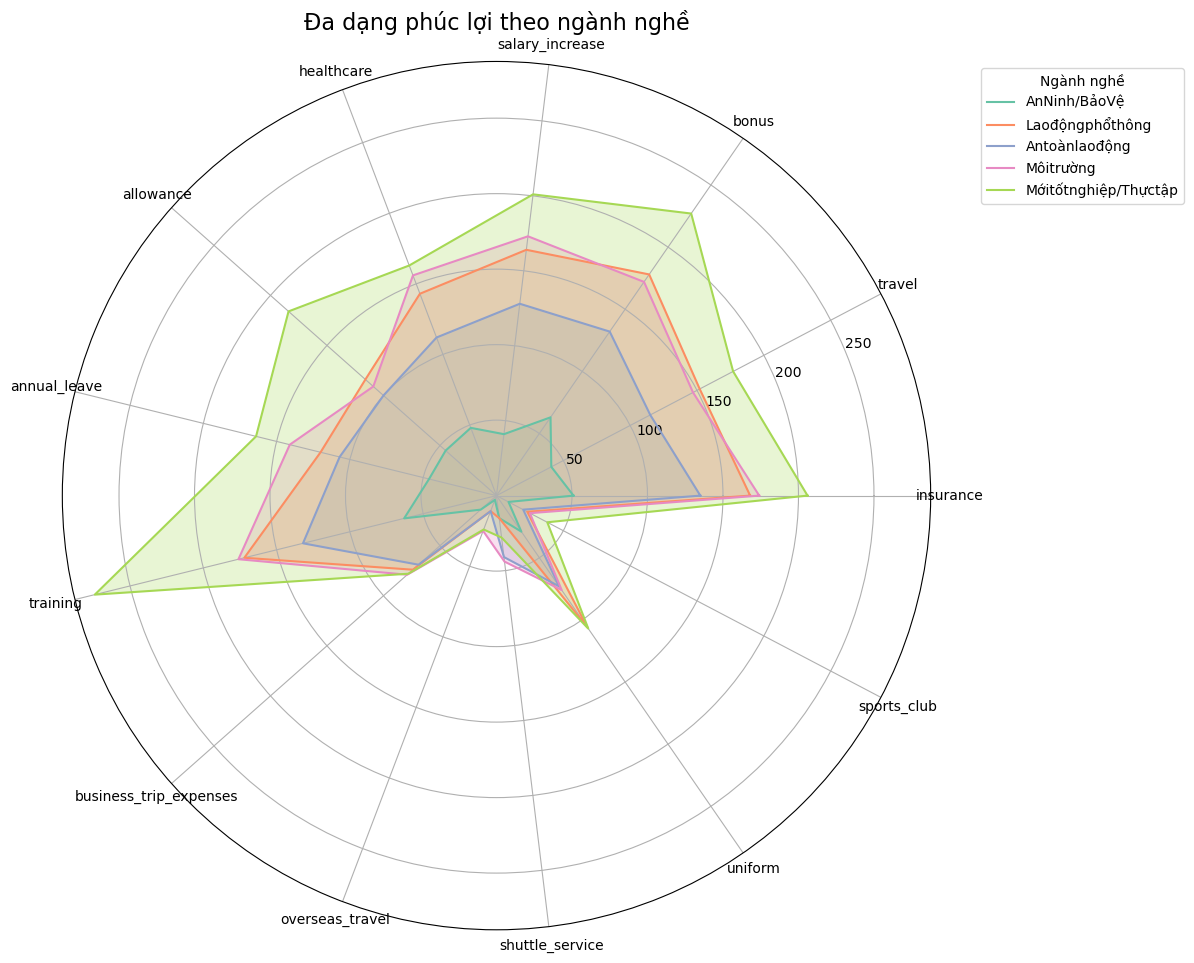

In [37]:
# Vẽ radar chart cho đa dạng phúc lợi theo ngành nghề
plt.figure(figsize=(12, 12))
for industry in top_industries:
    data = welfare_diversity_sorted.loc[industry, welfare_selected]
    angles = np.linspace(0, 2 * np.pi, len(welfare_selected), endpoint=False).tolist()
    data = pd.concat([data, data.iloc[[0]]])
    angles += angles[:1]
    plt.polar(angles, data, label=industry)
    plt.fill(angles, data, alpha=0.25)

plt.xticks(angles[:-1], welfare_selected)
plt.title('Đa dạng phúc lợi theo ngành nghề', fontsize=16)
plt.legend(title='Ngành nghề', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nhận xét:

- Ngành An Ninh/Bảo Vệ: Có vùng phủ lớn nhất trong biểu đồ, thể hiện mức độ phúc lợi đa dạng. Insurance (Bảo hiểm), Bonus (Thưởng), và Annual Leave (Nghỉ phép) là những phúc lợi phổ biến nhất, được áp dụng rộng rãi trong ngành này. Training (Đào tạo) cũng có tỷ lệ tương đối cao, cho thấy doanh nghiệp trong ngành này quan tâm đến nâng cao kỹ năng của nhân viên.
- Ngành Lao Động Phổ Thông: Có vùng phủ tương đối lớn, nhưng ít phúc lợi hơn so với An Ninh/Bảo Vệ. Phúc lợi nổi bật nhất là Bonus (Thưởng) và Allowance (Phụ cấp), phản ánh tính chất công việc phổ thông, thường có chính sách hỗ trợ thêm về tài chính thay vì các phúc lợi dài hạn.
- Ngành An Toàn Lao Động: Đặc biệt tập trung vào các phúc lợi như Insurance (Bảo hiểm) và Training (Đào tạo), do yêu cầu cao về an toàn và kỹ năng trong công việc. Phúc lợi như Salary Increase (Tăng lương) và Bonus (Thưởng) cũng được áp dụng ở mức trung bình.
- Ngành Môi Trường: Có vùng phủ nhỏ hơn, tập trung nhiều vào Healthcare (Chăm sóc sức khỏe), phản ánh tính chất công việc gắn liền với sức khỏe và điều kiện làm việc trong môi trường đặc thù. Các phúc lợi như Annual Leave (Nghỉ phép) và Bonus (Thưởng) cũng khá phổ biến.
- Ngành Môi Trường/Thực Tập: Vùng phủ nhỏ nhất, cho thấy phúc lợi hạn chế nhất. Chủ yếu tập trung vào Training (Đào tạo), do đây là nhóm lao động thực tập, cần học hỏi và nâng cao kỹ năng thay vì nhận các phúc lợi tài chính như bonus hoặc allowance.

=> Người lao động trong các ngành như An Ninh/Bảo Vệ có cơ hội nhận phúc lợi toàn diện hơn so với các ngành như Môi Trường hoặc Thực Tập. Thực tập sinh và nhân viên trong ngành môi trường cần cân nhắc nếu ưu tiên các phúc lợi tài chính như bonus hoặc tăng lương. Các doanh nghiệp trong ngành An Ninh/Bảo Vệ, Lao Động Phổ Thông cần duy trì các phúc lợi phổ biến như bảo hiểm, thưởng, nghỉ phép để giữ chân lao động. Ngành Môi Trường/Thực Tập cần cải thiện các phúc lợi tài chính để thu hút lao động trẻ.

#### 3.4 Câu hỏi 4 <a id="ii3d"></a>

##### Mức lương có phụ thuộc vào các gói phúc lợi không?

- Lợi ích khi trả lời câu hỏi: Giúp người lao động đánh giá tổng giá trị gói đãi ngộ. Người lao động có thể nhận ra rằng gói phúc lợi không chỉ là yếu tố bổ sung mà còn có tác động đáng kể đến tổng thu nhập. Ví dụ: Một công việc có mức lương cơ bản thấp nhưng cung cấp nhiều phúc lợi (bảo hiểm, đào tạo, phụ cấp) có thể mang lại giá trị tổng thể cao hơn. Thông tin còn giúp người lao động cân nhắc giữa mức lương và các phúc lợi đi kèm, từ đó lựa chọn công việc phù hợp với nhu cầu cá nhân (như ưu tiên bảo hiểm, thưởng, hoặc đào tạo). Còn đối với các doanh nghiệp, họ có thể cân nhắc giữa việc tăng mức lương hoặc bổ sung phúc lợi để tạo ra gói đãi ngộ hấp dẫn nhất với chi phí hợp lý.
Ví dụ: Thay vì tăng lương trực tiếp, doanh nghiệp có thể cung cấp phúc lợi như đào tạo hoặc chăm sóc sức khỏe để nâng cao sự hài lòng của nhân viên. Các gói phúc lợi hấp dẫn có thể giúp doanh nghiệp cạnh tranh tốt hơn trên thị trường lao động, đặc biệt khi mức lương không quá vượt trội.

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

# Tạo biến đếm số lượng phúc lợi
df_welfare_salary = df_salary_defined[df_salary_defined['Welfare'] != 'not_specified'].copy()

# Reset chỉ mục để đảm bảo tính đồng bộ
df_welfare_salary.reset_index(drop=True, inplace=True)

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa các gói phúc lợi thành các cột nhị phân
welfare_encoded = pd.DataFrame(
    mlb.fit_transform(df_welfare_salary['Welfare']),
    columns=mlb.classes_,
    index=df_welfare_salary.index
)

# Kiểm tra các cột phúc lợi đã mã hóa
print(welfare_encoded.head())

# Tạo cột 'Total Welfare Count' để lưu tổng số lượng phúc lợi
df_welfare_salary['Total Welfare Count'] = welfare_encoded.sum(axis=1)

      ,  _  a  b  c  e  f  g  h  ...  r  s  t  u  v  w  x  y  â  ê
0  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  0  1  0  0
1  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  0  1  0  0
2  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  1  1  1  1
3  1  1  1  1  1  1  1  0  1  1  ...  1  1  1  1  1  1  0  1  1  1
4  1  1  1  1  1  1  1  0  1  1  ...  1  1  1  1  1  1  0  1  1  1

[5 rows x 26 columns]


In [39]:
# Tính hệ số tương quan
correlation = df_welfare_salary[['Total Welfare Count', 'Salary']].corr()
print(correlation)

                     Total Welfare Count    Salary
Total Welfare Count             1.000000  0.079217
Salary                          0.079217  1.000000


Trực quan hóa

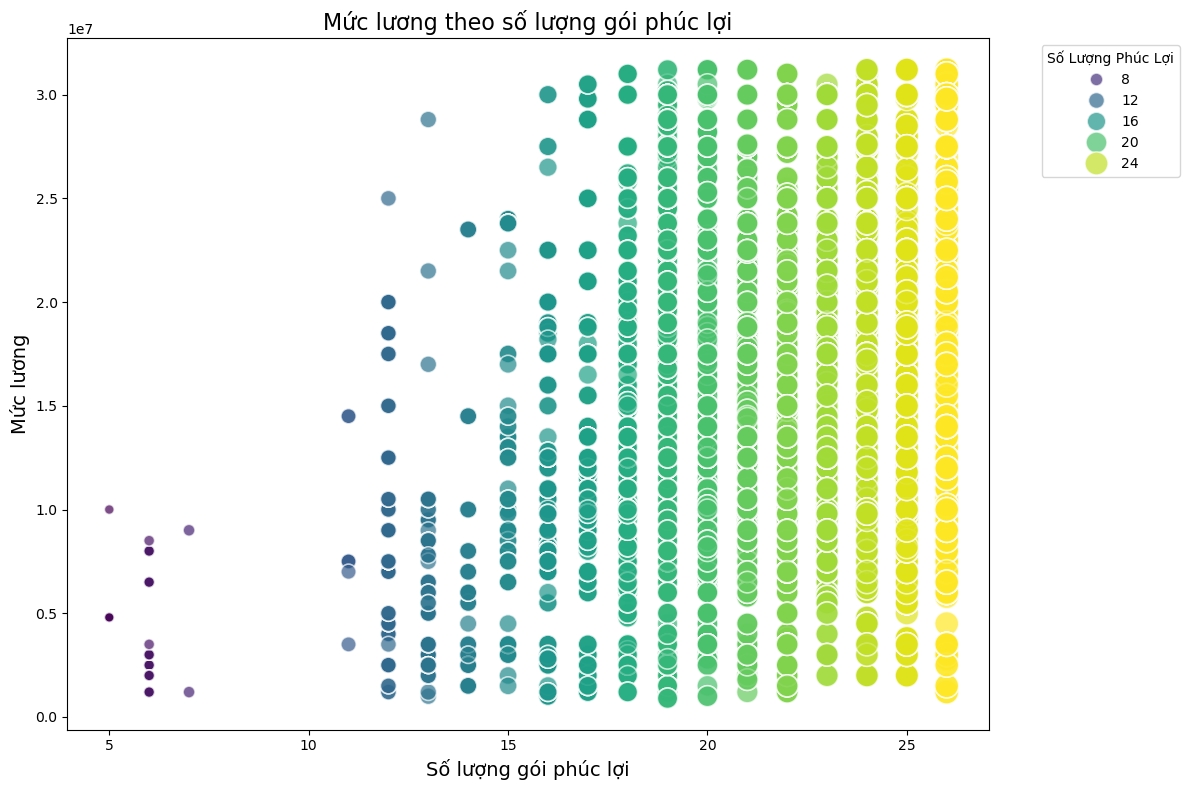

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_welfare_salary, 
    x='Total Welfare Count', 
    y='Salary', 
    hue='Total Welfare Count', 
    palette='viridis', 
    size='Total Welfare Count', 
    sizes=(50, 300), 
    alpha=0.7
)
plt.title('Mức lương theo số lượng gói phúc lợi', fontsize=16)
plt.xlabel('Số lượng gói phúc lợi', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.legend(title='Số Lượng Phúc Lợi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

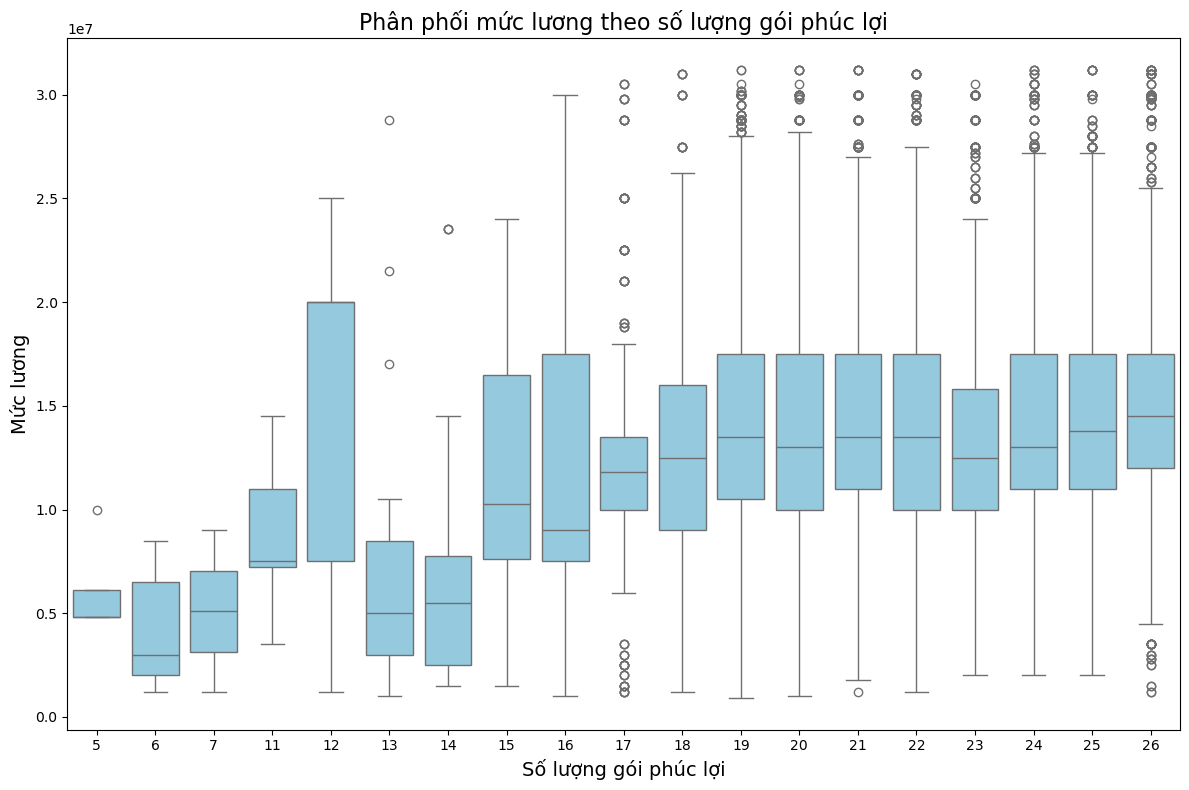

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(
    x='Total Welfare Count', 
    y='Salary', 
    data=df_welfare_salary, 
    color='skyblue'
)
plt.title('Phân phối mức lương theo số lượng gói phúc lợi', fontsize=16)
plt.xlabel('Số lượng gói phúc lợi', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.tight_layout()
plt.show()

Nhận xét:

- Số lượng gói phúc lợi càng cao, mức lương trung bình và trung vị càng tăng. Độ phân tán mức lương tăng ở nhóm phúc lợi cao: Ở nhóm số lượng phúc lợi thấp (5-10), mức lương có xu hướng tập trung và ít chênh lệch giữa các vị trí. Ở nhóm phúc lợi cao (20-26), mức lương phân tán nhiều hơn, thể hiện sự khác biệt giữa các ngành nghề hoặc cấp bậc công việc có gói phúc lợi toàn diện.
- Với nhóm 5-10 gói phúc lợi: Phần lớn là các công việc mức lương thấp, thường thuộc các ngành nghề bán thời gian, thời vụ hoặc thực tập. Giá trị trung vị trong nhóm này dưới 1 triệu VNĐ, phản ánh các công việc không yêu cầu nhiều quyền lợi.
- Với nhóm 11-15 gói phúc lợi: Mức lương trung bình bắt đầu tăng đáng kể, với trung vị khoảng 1.2 triệu VNĐ. Các công việc này thường thuộc nhóm nhân viên chính thức ở mức cơ bản.
- Với nhóm 16-20 gói phúc lợi: Phúc lợi tăng dẫn đến mức lương ổn định hơn, trung vị dao động từ 1.5 - 2 triệu VNĐ. Các giá trị ngoại lai thường xuất hiện ở mức cao (trên 2.5 triệu VNĐ).
- Với 21-26 gói phúc lợi: Đây là nhóm có mức lương cao nhất. Các công việc trong nhóm này thường là cấp bậc quản lý hoặc thuộc các doanh nghiệp lớn với chính sách phúc lợi toàn diện.

## Tài liệu tham khảo  <a id="tl"></a>